In [ ]:
import requests
import pandas as pd

# API 엔드포인트 URL
url = "https://www.aflowlib.org/API/aflux/?$catalog(ICSD),spinD(*),spin_atom(*),enthalpy_atom(*),energy_atom(*),volume_cell(*),crystal_system(*),positions_fractional(*),natoms(*),density(*),composition(*),$paging(1,2000)"

# API에 GET 요청을 보내고 JSON 데이터를 가져옵니다.
response = requests.get(url)
json_data = response.json()

# JSON 데이터를 추출하여 필요한 정보를 담은 리스트를 생성합니다.
data = []
for item in json_data:
    record = {
        "compound": item["compound"],
        "spacegroup_relax": item["spacegroup_relax"],
        "Pearson_symbol_relax": item["Pearson_symbol_relax"],
        "spinD": item["spinD"],
        "spin_atom": item["spin_atom"],
        "enthalpy_atom": item["enthalpy_atom"],
        "energy_atom": item["energy_atom"],
        "volume_cell": item["volume_cell"],
        "positions_fractional": item["positions_fractional"],
        "natoms": item["natoms"],
        "density": item["density"],
        "crystal_system": item["crystal_system"]
    }
    data.append(record)

# DataFrame 생성
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score

crystal = pd.read_csv('./data.csv')

X = crystal.iloc[:,0:-1]
y = crystal.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# 레이블 인코딩
encoded_labels = label_encoder.fit_transform(y)

# 매핑 정보 저장
mapping_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# DataFrame에 인코딩된 값으로 할당
y_encoded = pd.DataFrame(encoded_labels)

# 매핑 정보 출력
print(mapping_dict)

{'cubic': 0, 'hexagonal': 1, 'monoclinic': 2, 'orthorhombic': 3, 'tetragonal': 4, 'triclinic': 5, 'trigonal': 6}


In [ ]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(len(encoded_labels)):
  if encoded_labels[i] == 0:
    a += 1
  elif encoded_labels[i] == 1:
    b += 1
  elif encoded_labels[i] == 2:
    c += 1
  elif encoded_labels[i] == 3:
    d += 1
  elif encoded_labels[i] == 4:
    e += 1
  elif encoded_labels[i] == 5:
    f += 1
  elif encoded_labels[i] == 6:
    g += 1
print("Cubic : ", a)
print("hexagonal : ", b)
print("monoclinic : ", c)
print("orthorhombic : ", d)
print("tetragonal : ", e)
print("triclinic : ", f)
print("trigonal : ", g)    

Cubic :  509
hexagonal :  258
monoclinic :  281
orthorhombic :  385
tetragonal :  324
triclinic :  51
trigonal :  192


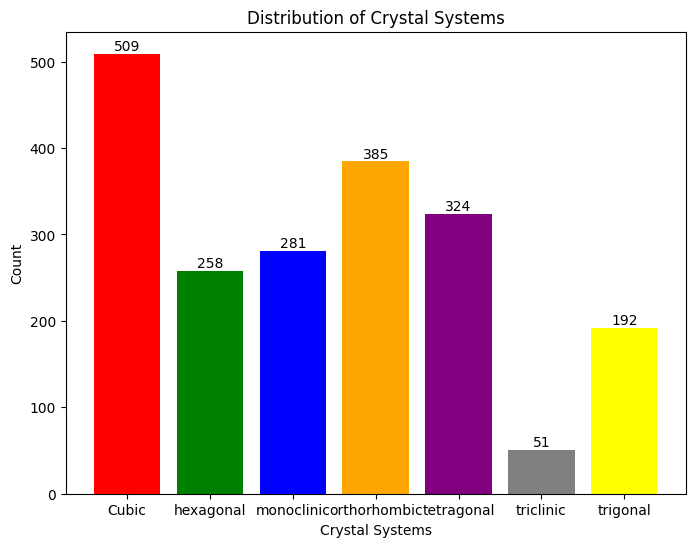

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
labels = ['Cubic', 'hexagonal', 'monoclinic', 'orthorhombic', 'tetragonal', 'triclinic', 'trigonal']
sizes = [a, b, c, d, e, f, g]

# 막대 색상 지정
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'yellow']

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors)

# 막대 끝부분에 개수 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), sizes[i],
             ha='center', va='bottom')

plt.title('Distribution of Crystal Systems')
plt.xlabel('Crystal Systems')
plt.ylabel('Count')
plt.show()

## 데이터 전처리

In [ ]:
import pandas as pd

# 원본 데이터프레임 복사
df_encoded_compound = X.copy()

# One-Hot Encoding 적용
one_hot = pd.get_dummies(df_encoded_compound['compound'], prefix='compound')
df_encoded_compound = pd.concat([df_encoded_compound, one_hot], axis=1)

# 'compound' 열 제거
df_encoded_compound.drop('compound', axis=1, inplace=True)

In [ ]:
# 원본 데이터프레임 복사
df_encoded_pearson = df_encoded_compound.copy()

# 'Pearson_symbol_relax' 열을 One-Hot Encoding으로 변환
one_hot = pd.get_dummies(df_encoded_pearson['Pearson_symbol_relax'], prefix='Pearson')
df_encoded_pearson = pd.concat([df_encoded_pearson, one_hot], axis=1)

# 'Pearson_symbol_relax' 열 제거
df_encoded_pearson.drop('Pearson_symbol_relax', axis=1, inplace=True)

# 변환된 데이터프레임 출력
# print(df_encoded_pearson)

In [ ]:
import numpy as np
# 원본 데이터프레임 복사
df_encoded_spind = df_encoded_pearson.copy()
df_encoded_spind['spinD_mean'] = 0

# 'spinD' 열의 값 변환
for i in range(len(df_encoded_spind)):
    spinD_list = eval(df_encoded_pearson['spinD'][i])
    spinD_mean = np.mean(spinD_list)
    df_encoded_spind['spinD_mean'][i] = spinD_mean
# # 'spinD' 열의 평균값 계산하여 새로운 열에 저장
# df_encoded_spind['spinD_mean'] = df_encoded_spind['spinD'].apply(lambda x: np.mean([float(val) for val in x if isinstance(val, (int, float))]) if isinstance(x, list) else x)

# # 'spinD' 열 제거
df_encoded_spind.drop('spinD', axis=1, inplace=True)

<ipython-input-62-e2690a7efffb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_spind['spinD_mean'][i] = spinD_mean


In [ ]:
df_encoded_position = df_encoded_spind.copy()
df_encoded_position['pf_x'] = 0
df_encoded_position['pf_y'] = 0
df_encoded_position['pf_z'] = 0

In [ ]:
def encode_positional_fractional(pos_frac):
  pos_frac = eval(pos_frac)
  pos_frac = np.array(pos_frac)
  mean_pos = np.mean(pos_frac, axis=0)
  return mean_pos

for i in range(len(df_encoded_position)):
  encoded_pos_frac = encode_positional_fractional(df_encoded_position['positions_fractional'][i])
  df_encoded_position['pf_x'][i] = encoded_pos_frac[0]
  df_encoded_position['pf_y'][i] = encoded_pos_frac[1]
  df_encoded_position['pf_z'][i] = encoded_pos_frac[2]

df_encoded_position.drop('positions_fractional', axis=1, inplace=True)
# df_encoded_position.drop('positions_mean', axis=1, inplace=True)

<ipython-input-64-703ca3321a2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_position['pf_x'][i] = encoded_pos_frac[0]
<ipython-input-64-703ca3321a2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_position['pf_y'][i] = encoded_pos_frac[1]
<ipython-input-64-703ca3321a2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_position['pf_z'][i] = encoded_pos_frac[2]


In [ ]:
X = df_encoded_position

In [ ]:
crystal_filtered = X.copy()
crystal_filtered['crystal_system'] = y_encoded

In [ ]:
y_encoded = y_encoded.astype(float)
crystal_filtered['crystal_system'] = crystal_filtered['crystal_system'].astype(float)
crystal_filtered['crystal_system'].dtype

dtype('float64')

In [ ]:
crystal_filtered

,spacegroup_relax,spin_atom,enthalpy_atom,energy_atom,volume_cell,natoms,density,compound_Ag1,compound_Ag12Au4Te8,compound_Ag1As1Se2,...,Pearson_tP6,Pearson_tP7,Pearson_tP72,Pearson_tP8,Pearson_tP9,spinD_mean,pf_x,pf_y,pf_z,crystal_system
0,58,0.000000,-2.72447,-2.72447,163.7510,6,3.595990,0,0,0,...,0,0,0,0,0,0.000,0.250000,0.416667,0.416667,3.0
1,225,0.000000,-8.01513,-8.01513,41.3850,3,6.906130,0,0,0,...,0,0,0,0,0,0.000,0.333333,0.333333,0.333333,0.0
2,135,0.571386,-6.20212,-6.20212,462.2140,28,5.221380,0,0,0,...,0,0,0,0,0,0.555,0.464286,0.464286,0.357143,4.0
3,227,1.136730,-4.59774,-4.59774,110.9570,6,6.188970,0,0,0,...,0,0,0,0,0,1.294,0.375000,0.375000,0.375000,0.0
4,194,0.000000,-6.52732,-6.52732,109.7740,8,4.138350,0,0,0,...,0,0,0,0,0,0.000,0.375000,0.375000,0.437500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,227,0.000000,-5.42374,-5.42374,40.8572,2,2.282930,0,0,0,...,0,0,0,0,0,0.000,0.125000,0.125000,0.125000,0.0
1996,156,0.000000,-3.25413,-3.25413,543.2270,28,4.169980,0,0,0,...,0,0,0,0,0,0.000,0.500000,0.500000,0.491074,6.0
1997,194,1.000000,-1.09345,-1.09345,69.6412,2,0.048065,0,0,0,...,0,0,0,0,0,0.385,0.500000,0.500000,0.500000,1.0
1998,140,0.000000,-3.89274,-3.89274,502.8900,16,6.234020,0,0,0,...,0,0,0,0,0,0.000,0.468750,0.468750,0.375000,4.0


In [ ]:
import pandas as pd

def remove_low_correlation_features(X, y, threshold):
    data = X.copy()
    data['crystal_system'] = y_encoded
    corr_matrix = data.corr().abs()  # 상관관계 행렬 생성
    correlations = corr_matrix['crystal_system'].drop('crystal_system')  # 'crystal_system'과의 상관관계 추출
    low_correlation_features = correlations[correlations < threshold].index  # 상관관계가 임계값 미만인 feature 추출
    filtered_data = data.drop(columns=low_correlation_features)  # 낮은 상관관계 feature 제거
    filtered_X = filtered_data.drop(columns='crystal_system')  # 'crystal_system' 열 제거
    filtered_y = filtered_data['crystal_system']  # 'crystal_system' 열을 y로 설정
    return filtered_X, filtered_y

threshold = 0.15  # 임계값 설정
filtered_X, filtered_y = remove_low_correlation_features(X, y, threshold)

In [ ]:
y = filtered_y
filtered_X['crystal_system'] = y
crystal_filtered = filtered_X

In [ ]:
corr = crystal_filtered.corr()
a = corr['crystal_system'].sort_values(ascending = False)
x = a.drop(['crystal_system'])
x

pf_y                0.340843
pf_x                0.336461
Pearson_hR10        0.236860
pf_z                0.193201
Pearson_hR4         0.182914
Pearson_cP2        -0.153869
Pearson_cF16       -0.153869
Pearson_cP4        -0.161266
Pearson_cF24       -0.202325
density            -0.212014
Pearson_cF8        -0.253558
spacegroup_relax   -0.447502
Name: crystal_system, dtype: float64

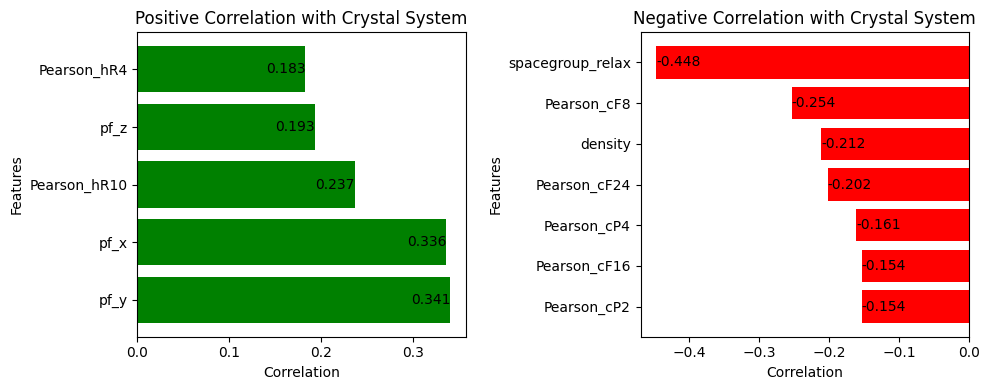

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 양수 값과 음수 값 분리
positive_values = x[x > 0]
negative_values = x[x < 0]

# 1행 2열의 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 양수 값 그래프
axes[0].barh(positive_values.index, positive_values, color='green')
axes[0].set_xlabel('Correlation')
axes[0].set_ylabel('Features')
axes[0].set_title('Positive Correlation with Crystal System')

# 양수 값 텍스트 표시 (막대 그래프 끝 부분)
for i, v in enumerate(positive_values):
    axes[0].text(v, i, str(round(v, 3)), color='black', va='center', ha='right')

# 음수 값 그래프
axes[1].barh(negative_values.index, negative_values, color='red')
axes[1].set_xlabel('Correlation')
axes[1].set_ylabel('Features')
axes[1].set_title('Negative Correlation with Crystal System')

# 음수 값 텍스트 표시 (막대 그래프 끝 부분)
for i, v in enumerate(negative_values):
    axes[1].text(v, i, str(round(v, 3)), color='black', va='center', ha='left')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
crystal_filtered

,spacegroup_relax,density,Pearson_cF16,Pearson_cF24,Pearson_cF8,Pearson_cP2,Pearson_cP4,Pearson_hR10,Pearson_hR4,pf_x,pf_y,pf_z,crystal_system
0,58,3.595990,0,0,0,0,0,0,0,0.250000,0.416667,0.416667,3.0
1,225,6.906130,0,0,0,0,0,0,0,0.333333,0.333333,0.333333,0.0
2,135,5.221380,0,0,0,0,0,0,0,0.464286,0.464286,0.357143,4.0
3,227,6.188970,0,1,0,0,0,0,0,0.375000,0.375000,0.375000,0.0
4,194,4.138350,0,0,0,0,0,0,0,0.375000,0.375000,0.437500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,227,2.282930,0,0,1,0,0,0,0,0.125000,0.125000,0.125000,0.0
1996,156,4.169980,0,0,0,0,0,0,0,0.500000,0.500000,0.491074,6.0
1997,194,0.048065,0,0,0,0,0,0,0,0.500000,0.500000,0.500000,1.0
1998,140,6.234020,0,0,0,0,0,0,0,0.468750,0.468750,0.375000,4.0


In [ ]:
import numpy as np

def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    filtered_data = data[z_scores < threshold]
    trash_data = data[z_scores >= threshold]
    
    if len(trash_data) == 0:
        print('No outliers detected')
    else:
        print('Outliers:', trash_data)
    
    return filtered_data

In [ ]:
remove_outliers_zscore(crystal_filtered)

Outliers:       spacegroup_relax  density  Pearson_cF16  Pearson_cF24  Pearson_cF8  \
0                  NaN      NaN           NaN           NaN          NaN   
1                  NaN      NaN           NaN           NaN          NaN   
2                  NaN      NaN           NaN           NaN          NaN   
3                  NaN      NaN           NaN           1.0          NaN   
4                  NaN      NaN           NaN           NaN          NaN   
...                ...      ...           ...           ...          ...   
1995               NaN      NaN           NaN           NaN          1.0   
1996               NaN      NaN           NaN           NaN          NaN   
1997               NaN      NaN           NaN           NaN          NaN   
1998               NaN      NaN           NaN           NaN          NaN   
1999               NaN      NaN           NaN           NaN          NaN   

      Pearson_cP2  Pearson_cP4  Pearson_hR10  Pearson_hR4  pf_x   pf_y  pf_z 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,spacegroup_relax,density,Pearson_cF16,Pearson_cF24,Pearson_cF8,Pearson_cP2,Pearson_cP4,Pearson_hR10,Pearson_hR4,pf_x,pf_y,pf_z,crystal_system
0,58,3.595990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.416667,0.416667,3.0
1,225,6.906130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0
2,135,5.221380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464286,0.464286,0.357143,4.0
3,227,6.188970,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.375000,0.375000,0.375000,0.0
4,194,4.138350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.375000,0.437500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,227,2.282930,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.125000,NaN,0.125000,0.0
1996,156,4.169980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.491074,6.0
1997,194,0.048065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.500000,1.0
1998,140,6.234020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468750,0.468750,0.375000,4.0


In [ ]:
import numpy as np
from scipy.stats import mode

# 데이터 배열에서 최빈값을 찾는 함수
def find_mode(data):
    # 최빈값 계산
    mode_value = mode(data)
    # 최빈값이 여러 개인 경우 첫 번째 값을 반환
    return mode_value[0][0]

# 데이터 배열에서 NaN 값을 최빈값으로 대체하는 함수
def replace_nan_with_mode(data):
    # 데이터 배열에서 최빈값 찾기
    data_mode = find_mode(data)
    # NaN 값을 최빈값으로 대체
    data_filled = np.where(np.isnan(data), data_mode, data)
    return data_filled


data_filled = replace_nan_with_mode(crystal_filtered)

print("Original data:", crystal_filtered)
print("Filled data:", data_filled)

Original data:       spacegroup_relax    density  Pearson_cF16  Pearson_cF24  Pearson_cF8  \
0                   58   3.595990           0.0           0.0          0.0   
1                  225   6.906130           0.0           0.0          0.0   
2                  135   5.221380           0.0           0.0          0.0   
3                  227   6.188970           0.0           NaN          0.0   
4                  194   4.138350           0.0           0.0          0.0   
...                ...        ...           ...           ...          ...   
1995               227   2.282930           0.0           0.0          NaN   
1996               156   4.169980           0.0           0.0          0.0   
1997               194   0.048065           0.0           0.0          0.0   
1998               140   6.234020           0.0           0.0          0.0   
1999               189  12.069600           0.0           0.0          0.0   

      Pearson_cP2  Pearson_cP4  Pearson_hR10  Pe

<ipython-input-29-0ba9698bb223>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(data)


In [ ]:
import pandas as pd

# DataFrame으로 변환하는 함수
def array_to_dataframe(data_filled):
    # feature 이름 리스트
    feature_names = ["spacegroup_relax",	"density",	"Pearson_cF16",	"Pearson_cF24",	"Pearson_cF8",	"Pearson_cP2",	"Pearson_cP4", "Pearson_hR10",	"Pearson_hR4",	"pf_x",	"pf_y",	"pf_z",	"crystal_system"]  # feature의 이름을 지정해주세요

    # DataFrame 생성
    df = pd.DataFrame(data_filled, columns=feature_names)
    return df

# DataFrame으로 변환
df_filled = array_to_dataframe(data_filled)

# 출력
df_filled

,spacegroup_relax,density,Pearson_cF16,Pearson_cF24,Pearson_cF8,Pearson_cP2,Pearson_cP4,Pearson_hR10,Pearson_hR4,pf_x,pf_y,pf_z,crystal_system
0,58.0,3.595990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.416667,0.416667,3.0
1,225.0,6.906130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0
2,135.0,5.221380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464286,0.464286,0.357143,4.0
3,227.0,6.188970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.375000,0.375000,0.0
4,194.0,4.138350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.375000,0.437500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,227.0,2.282930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.500000,0.125000,0.0
1996,156.0,4.169980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.491074,6.0
1997,194.0,0.048065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.500000,1.0
1998,140.0,6.234020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468750,0.468750,0.375000,4.0


In [ ]:
X = crystal_filtered.iloc[:,0:-1]
y = crystal_filtered.iloc[:,-1]
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 54)

X_train_final,y_train_final = smote.fit_resample(X, y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_final.shape, y_train_final.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_final).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2000, 12) (2000,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3563, 12) (3563,)
SMOTE 적용 후 레이블 값 분포: 
 3.0    509
0.0    509
4.0    509
1.0    509
5.0    509
2.0    509
6.0    509
Name: crystal_system, dtype: int64


In [ ]:
oversampling = pd.DataFrame(X_train_final)
oversampling['crystal_system'] = y_train_final

In [ ]:
oversampling

,spacegroup_relax,density,Pearson_cF16,Pearson_cF24,Pearson_cF8,Pearson_cP2,Pearson_cP4,Pearson_hR10,Pearson_hR4,pf_x,pf_y,pf_z,crystal_system
0,58,3.595990,0,0,0,0,0,0,0,0.250000,0.416667,0.416667,3.0
1,225,6.906130,0,0,0,0,0,0,0,0.333333,0.333333,0.333333,0.0
2,135,5.221380,0,0,0,0,0,0,0,0.464286,0.464286,0.357143,4.0
3,227,6.188970,0,1,0,0,0,0,0,0.375000,0.375000,0.375000,0.0
4,194,4.138350,0,0,0,0,0,0,0,0.375000,0.375000,0.437500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,166,6.188331,0,0,0,0,0,0,0,0.400000,0.400000,0.400000,6.0
3559,166,5.901052,0,0,0,0,0,0,0,0.437209,0.437209,0.437209,6.0
3560,147,2.216847,0,0,0,0,0,0,0,0.499461,0.499461,0.499731,6.0
3561,166,7.762351,0,0,0,0,0,0,0,0.467383,0.467383,0.467383,6.0


In [ ]:
a_1 = 0
b_1 = 0
c_1 = 0
d_1 = 0
e_1 = 0
f_1 = 0
g_1 = 0
for i in range(len(y_train_final)):
  if y_train_final[i] == 0:
    a_1 += 1
  elif y_train_final[i] == 1:
    b_1 += 1
  elif y_train_final[i] == 2:
    c_1 += 1
  elif y_train_final[i] == 3:
    d_1 += 1
  elif y_train_final[i] == 4:
    e_1 += 1
  elif y_train_final[i] == 5:
    f_1 += 1
  elif y_train_final[i] == 6:
    g_1 += 1
print("Cubic : ", a_1)
print("hexagonal : ", b_1)
print("monoclinic : ", c_1)
print("orthorhombic : ", d_1)
print("tetragonal : ", e_1)
print("triclinic : ", f_1)
print("trigonal : ", g_1)    

Cubic :  509
hexagonal :  509
monoclinic :  509
orthorhombic :  509
tetragonal :  509
triclinic :  509
trigonal :  509


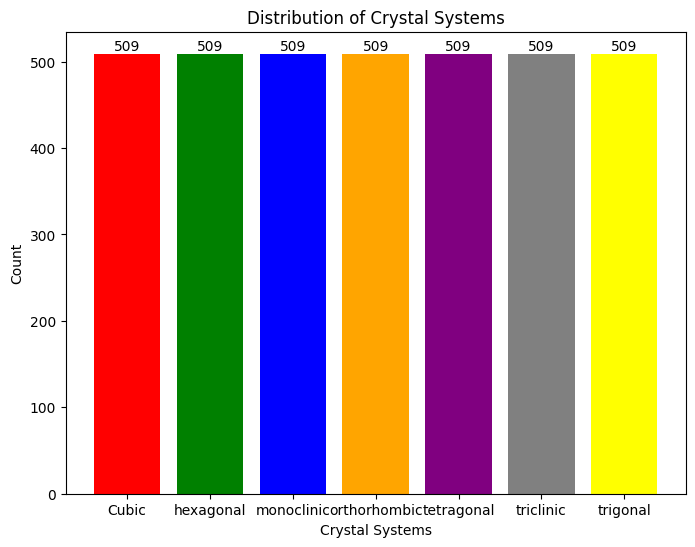

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
labels = ['Cubic', 'hexagonal', 'monoclinic', 'orthorhombic', 'tetragonal', 'triclinic', 'trigonal']
sizes = [a_1, b_1, c_1, d_1, e_1, f_1, g_1]

# 막대 색상 지정
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'yellow']

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors)

# 막대 끝부분에 개수 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), sizes[i],
             ha='center', va='bottom')

plt.title('Distribution of Crystal Systems')
plt.xlabel('Crystal Systems')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch

X = oversampling.iloc[:,0:-1]
y = oversampling.iloc[:,-1]

# 원-핫 인코딩
onehot_encoder = OneHotEncoder(sparse=False)
y_encoded = y.values.reshape(-1, 1)
y_onehot = onehot_encoder.fit_transform(y_encoded)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
robustScaler = RobustScaler()
X_train = robustScaler.fit_transform(X_train)
X_test = robustScaler.transform(X_test)

train_x = torch.from_numpy(X_train).float()
train_y = torch.from_numpy(y_train).float()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
test_x = torch.from_numpy(X_test).float()
test_y = torch.from_numpy(y_test).float()

In [ ]:
%pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_x.shape

torch.Size([2850, 12])

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch

train_data = torch.utils.data.TensorDataset(train_x, train_y)
test_data = torch.utils.data.TensorDataset(test_x, test_y)

batch_size = 16

train_set, val_set = torch.utils.data.random_split(train_data, [2140, 710])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [ ]:
import torch

def calculate_f1_score(y_true, y_pred):
    tp = (y_true * y_pred).sum(dim=0)  # True Positive
    fp = ((1 - y_true) * y_pred).sum(dim=0)  # False Positive
    fn = (y_true * (1 - y_pred)).sum(dim=0)  # False Negative

    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)

    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    f1_score = f1.mean()

    return f1_score


In [ ]:
import tqdm
valid_f1_scores = []
max_f1_scores = 0
def valid(data_loader, model):
    """ model inference """
    n_predict = 0
    f1_score = 0.0

    with torch.no_grad():
        for X, Y in tqdm.tqdm(data_loader):
            y_hat = model(X)
            predicted = (y_hat > 0.5).float()  # 이진 분류 임계값 설정 (0.5)
            f1_score += calculate_f1_score(Y, predicted) * len(predicted)
            n_predict += len(predicted)

    f1_score /= n_predict
    valid_f1_scores.append(f1_score)
    max_f1_scores = max(valid_f1_scores)
    print("[Epoch:{:>2}, F1 Score:={:>.9}".format(epoch + 1, f1_score))  # 개행 문자 추가

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyModel, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# HyperParameter Tuning

In [ ]:
from sklearn.base import BaseEstimator

class MyModelEstimator(BaseEstimator):
    def __init__(self, hidden_size=64, learning_rate=0.001, epochs=100):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        input_size = X.shape[1]
        output_size = y.shape[1]
        self.model = MyModel(input_size, self.hidden_size, output_size)

        criterion = nn.BCELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

        train_losses = []

        # Early stopping 관련 변수
        best_loss = float('inf')
        patience = 10
        counter = 0

        # 학습 과정
        for epoch in range(self.epochs):
            self.model.train()
            cost = 0
            n_batches = 0
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_hat = self.model(X_batch)
                loss = criterion(y_hat, y_batch)
                loss.backward()
                optimizer.step()

                cost += loss.item()
                n_batches += 1

            cost /= n_batches
            train_losses.append(cost)  # 각 epoch에서의 loss 값을 기록

            # Early stopping 검사
            if cost < best_loss:
                best_loss = cost
                counter = 0
            else:
                counter += 1
                if counter >= patience:
                    print("Early stopping!")
                    break

    def score(self, X, y):
        self.model.eval()
        with torch.no_grad():
            y_pred = self.model(X)
            predictions = (y_pred > 0.5).float()
            accuracy = (predictions == y).float().mean()
        return accuracy

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            y_pred = self.model(X)
            predictions = (y_pred > 0.5).float()
        return predictions


In [ ]:
from skopt import BayesSearchCV

# 모델 생성 함수
def create_model(hidden_size, learning_rate, epochs):
    model = MyModel(input_size, hidden_size, output_size)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []

    # Early stopping 관련 변수
    best_loss = float('inf')
    patience = 10
    counter = 0

    # 학습 과정
    for epoch in range(epochs):
        model.train()
        cost = 0
        n_batches = 0
        for X, y in tqdm.tqdm(train_loader):
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()

            cost += loss.item()
            n_batches += 1

        cost /= n_batches
        train_losses.append(cost)  # 각 epoch에서의 loss 값을 기록

        # Early stopping 검사
        if cost < best_loss:
            best_loss = cost
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping!")
                break

    return model

# 하이퍼파라미터 공간 설정
param_space = {
    'hidden_size': (32, 128),
    'learning_rate': (0.0001, 0.01, 'log-uniform'),
    'epochs': (50, 500)
}

# 베이지안 최적화 설정
opt = BayesSearchCV(
    MyModelEstimator(),
    param_space,
    n_iter=50,  # 반복 횟수 설정
    cv=3,
    scoring='f1_macro',  # 적절한 평가 지표 설정
    n_jobs=-1
)

# 모델 훈련 및 최적 하이퍼파라미터 탐색
opt.fit(train_x, train_y)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", opt.best_params_)

# 최적의 모델 가져오기
best_model = opt.best_estimator_

# 최적의 모델 평가
f1_score = best_model.score(test_x, test_y)
print('Test f1_score:', f1_score)


Best Parameters:  OrderedDict([('epochs', 500), ('hidden_size', 32), ('learning_rate', 0.0006203247158560829)])
Test f1_score: tensor(0.9982)


## Training and Test

In [ ]:
# 모델 인스턴스 생성
input_size = train_x.shape[1]
hidden_size = 32
output_size = train_y.shape[1]
model = MyModel(input_size, hidden_size, output_size)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0006203247158560829)

100%|██████████| 134/134 [00:00<00:00, 925.43it/s]


Train
[Epoch:    1 cost = 0.570489061
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1705.97it/s]


[Epoch: 1, F1 Score:=0.0


100%|██████████| 134/134 [00:00<00:00, 928.72it/s]


Train
[Epoch:    2 cost = 0.389765523
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1942.57it/s]


[Epoch: 2, F1 Score:=0.0


100%|██████████| 134/134 [00:00<00:00, 890.06it/s]


Train
[Epoch:    3 cost = 0.336867545
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1346.27it/s]


[Epoch: 3, F1 Score:=0.0597183183


100%|██████████| 134/134 [00:00<00:00, 692.99it/s]


Train
[Epoch:    4 cost = 0.293933756
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1547.92it/s]


[Epoch: 4, F1 Score:=0.152327314


100%|██████████| 134/134 [00:00<00:00, 734.03it/s]


Train
[Epoch:    5 cost = 0.264588156
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1739.04it/s]


[Epoch: 5, F1 Score:=0.207696989


100%|██████████| 134/134 [00:00<00:00, 711.44it/s]


Train
[Epoch:    6 cost = 0.24609495
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1606.01it/s]


[Epoch: 6, F1 Score:=0.296760917


100%|██████████| 134/134 [00:00<00:00, 768.27it/s]


Train
[Epoch:    7 cost = 0.231364346
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1293.76it/s]


[Epoch: 7, F1 Score:=0.35830608


100%|██████████| 134/134 [00:00<00:00, 746.07it/s]


Train
[Epoch:    8 cost = 0.218012116
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1773.72it/s]


[Epoch: 8, F1 Score:=0.414541811


100%|██████████| 134/134 [00:00<00:00, 809.99it/s]


Train
[Epoch:    9 cost = 0.205366996
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1697.85it/s]


[Epoch: 9, F1 Score:=0.458945394


100%|██████████| 134/134 [00:00<00:00, 841.44it/s]


Train
[Epoch:   10 cost = 0.193477265
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1677.13it/s]

[Epoch:10, F1 Score:=0.493292451

100%|██████████| 134/134 [00:00<00:00, 747.55it/s]


Train
[Epoch:   11 cost = 0.182666541
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1594.13it/s]


[Epoch:11, F1 Score:=0.521446049


100%|██████████| 134/134 [00:00<00:00, 683.05it/s]


Train
[Epoch:   12 cost = 0.172879233
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1621.11it/s]


[Epoch:12, F1 Score:=0.533937514


100%|██████████| 134/134 [00:00<00:00, 770.84it/s]


Train
[Epoch:   13 cost = 0.164002638
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1602.31it/s]


[Epoch:13, F1 Score:=0.551203012


100%|██████████| 134/134 [00:00<00:00, 722.39it/s]


Train
[Epoch:   14 cost = 0.1559089
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2044.34it/s]


[Epoch:14, F1 Score:=0.577906668


100%|██████████| 134/134 [00:00<00:00, 909.28it/s]


Train
[Epoch:   15 cost = 0.148484153
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1836.64it/s]


[Epoch:15, F1 Score:=0.599831164


100%|██████████| 134/134 [00:00<00:00, 961.87it/s]


Train
[Epoch:   16 cost = 0.141629869
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2083.40it/s]


[Epoch:16, F1 Score:=0.628886282


100%|██████████| 134/134 [00:00<00:00, 947.67it/s]


Train
[Epoch:   17 cost = 0.135286215
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1670.42it/s]


[Epoch:17, F1 Score:=0.649653494


100%|██████████| 134/134 [00:00<00:00, 889.09it/s]


Train
[Epoch:   18 cost = 0.129485544
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1825.06it/s]


[Epoch:18, F1 Score:=0.669739604


100%|██████████| 134/134 [00:00<00:00, 827.83it/s]


Train
[Epoch:   19 cost = 0.124185074
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1621.69it/s]


[Epoch:19, F1 Score:=0.702931881


100%|██████████| 134/134 [00:00<00:00, 862.47it/s]


Train
[Epoch:   20 cost = 0.1192597
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1908.60it/s]


[Epoch:20, F1 Score:=0.71258986


100%|██████████| 134/134 [00:00<00:00, 868.88it/s]


Train
[Epoch:   21 cost = 0.114681183
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1904.19it/s]


[Epoch:21, F1 Score:=0.725267887


100%|██████████| 134/134 [00:00<00:00, 901.40it/s]


Train
[Epoch:   22 cost = 0.110367479
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2004.14it/s]


[Epoch:22, F1 Score:=0.731327474


100%|██████████| 134/134 [00:00<00:00, 830.11it/s]


Train
[Epoch:   23 cost = 0.106301456
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1942.97it/s]


[Epoch:23, F1 Score:=0.738684535


100%|██████████| 134/134 [00:00<00:00, 954.39it/s]


Train
[Epoch:   24 cost = 0.102510004
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2044.69it/s]


[Epoch:24, F1 Score:=0.743835449


100%|██████████| 134/134 [00:00<00:00, 944.36it/s]


Train
[Epoch:   25 cost = 0.0989567351
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1961.71it/s]


[Epoch:25, F1 Score:=0.746887445


100%|██████████| 134/134 [00:00<00:00, 915.98it/s]


Train
[Epoch:   26 cost = 0.0956158153
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1757.08it/s]


[Epoch:26, F1 Score:=0.765191674


100%|██████████| 134/134 [00:00<00:00, 900.08it/s]


Train
[Epoch:   27 cost = 0.0924553985
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1982.02it/s]


[Epoch:27, F1 Score:=0.769269586


100%|██████████| 134/134 [00:00<00:00, 868.02it/s]


Train
[Epoch:   28 cost = 0.0894647933
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1841.78it/s]


[Epoch:28, F1 Score:=0.77550894


100%|██████████| 134/134 [00:00<00:00, 889.10it/s]


Train
[Epoch:   29 cost = 0.0866201255
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1627.70it/s]


[Epoch:29, F1 Score:=0.782944083


100%|██████████| 134/134 [00:00<00:00, 958.71it/s]


Train
[Epoch:   30 cost = 0.0839103731
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1852.95it/s]


[Epoch:30, F1 Score:=0.785948753


100%|██████████| 134/134 [00:00<00:00, 908.23it/s]


Train
[Epoch:   31 cost = 0.0813443907
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1842.71it/s]


[Epoch:31, F1 Score:=0.791907012


100%|██████████| 134/134 [00:00<00:00, 924.62it/s]


Train
[Epoch:   32 cost = 0.0788814658
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2180.12it/s]


[Epoch:32, F1 Score:=0.793814242


100%|██████████| 134/134 [00:00<00:00, 893.26it/s]


Train
[Epoch:   33 cost = 0.0765279385
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1524.89it/s]


[Epoch:33, F1 Score:=0.795766234


100%|██████████| 134/134 [00:00<00:00, 920.91it/s]


Train
[Epoch:   34 cost = 0.074264363
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2107.01it/s]


[Epoch:34, F1 Score:=0.804887652


100%|██████████| 134/134 [00:00<00:00, 848.98it/s]


Train
[Epoch:   35 cost = 0.0720509142
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1612.81it/s]


[Epoch:35, F1 Score:=0.809348583


100%|██████████| 134/134 [00:00<00:00, 932.29it/s]


Train
[Epoch:   36 cost = 0.0699387181
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1554.85it/s]


[Epoch:36, F1 Score:=0.812261343


100%|██████████| 134/134 [00:00<00:00, 909.33it/s]


Train
[Epoch:   37 cost = 0.067895204
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2000.80it/s]


[Epoch:37, F1 Score:=0.817320228


100%|██████████| 134/134 [00:00<00:00, 989.21it/s] 


Train
[Epoch:   38 cost = 0.0659208634
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1612.60it/s]


[Epoch:38, F1 Score:=0.823022962


100%|██████████| 134/134 [00:00<00:00, 836.08it/s]


Train
[Epoch:   39 cost = 0.0639873384
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1423.52it/s]


[Epoch:39, F1 Score:=0.825001895


100%|██████████| 134/134 [00:00<00:00, 945.24it/s]


Train
[Epoch:   40 cost = 0.0621557781
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1748.73it/s]


[Epoch:40, F1 Score:=0.828037202


100%|██████████| 134/134 [00:00<00:00, 896.32it/s]


Train
[Epoch:   41 cost = 0.0603646893
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2026.13it/s]


[Epoch:41, F1 Score:=0.82996875


100%|██████████| 134/134 [00:00<00:00, 890.90it/s]


Train
[Epoch:   42 cost = 0.0586459105
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1625.28it/s]


[Epoch:42, F1 Score:=0.834015906


100%|██████████| 134/134 [00:00<00:00, 920.38it/s]


Train
[Epoch:   43 cost = 0.0569948969
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1812.89it/s]


[Epoch:43, F1 Score:=0.838532209


100%|██████████| 134/134 [00:00<00:00, 860.51it/s]


Train
[Epoch:   44 cost = 0.0553937272
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1698.53it/s]


[Epoch:44, F1 Score:=0.844434202


100%|██████████| 134/134 [00:00<00:00, 925.50it/s]


Train
[Epoch:   45 cost = 0.0538319103
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1647.64it/s]


[Epoch:45, F1 Score:=0.85262543


100%|██████████| 134/134 [00:00<00:00, 915.78it/s]


Train
[Epoch:   46 cost = 0.0523274112
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1635.79it/s]


[Epoch:46, F1 Score:=0.855666041


100%|██████████| 134/134 [00:00<00:00, 900.63it/s]


Train
[Epoch:   47 cost = 0.0509104137
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2040.27it/s]


[Epoch:47, F1 Score:=0.858983338


100%|██████████| 134/134 [00:00<00:00, 886.96it/s]


Train
[Epoch:   48 cost = 0.0495015042
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1772.62it/s]


[Epoch:48, F1 Score:=0.86269331


100%|██████████| 134/134 [00:00<00:00, 844.27it/s]


Train
[Epoch:   49 cost = 0.0481571341
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1809.99it/s]


[Epoch:49, F1 Score:=0.874256432


100%|██████████| 134/134 [00:00<00:00, 881.98it/s]


Train
[Epoch:   50 cost = 0.0468341537
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1525.08it/s]


[Epoch:50, F1 Score:=0.878274262


100%|██████████| 134/134 [00:00<00:00, 921.53it/s]


Train
[Epoch:   51 cost = 0.0455936864
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1414.55it/s]


[Epoch:51, F1 Score:=0.882828474


100%|██████████| 134/134 [00:00<00:00, 887.80it/s]


Train
[Epoch:   52 cost = 0.0443918562
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1621.43it/s]


[Epoch:52, F1 Score:=0.888480186


100%|██████████| 134/134 [00:00<00:00, 899.03it/s]


Train
[Epoch:   53 cost = 0.0432336603
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1747.89it/s]


[Epoch:53, F1 Score:=0.891884744


100%|██████████| 134/134 [00:00<00:00, 885.45it/s]


Train
[Epoch:   54 cost = 0.0421147796
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1503.10it/s]


[Epoch:54, F1 Score:=0.89496994


100%|██████████| 134/134 [00:00<00:00, 910.21it/s]


Train
[Epoch:   55 cost = 0.0410883302
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1803.26it/s]


[Epoch:55, F1 Score:=0.895859063


100%|██████████| 134/134 [00:00<00:00, 903.67it/s]


Train
[Epoch:   56 cost = 0.0400478133
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1599.56it/s]


[Epoch:56, F1 Score:=0.896502972


100%|██████████| 134/134 [00:00<00:00, 869.82it/s]


Train
[Epoch:   57 cost = 0.0390880557
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1637.53it/s]


[Epoch:57, F1 Score:=0.898667037


100%|██████████| 134/134 [00:00<00:00, 929.08it/s]


Train
[Epoch:   58 cost = 0.0381526829
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1971.44it/s]


[Epoch:58, F1 Score:=0.898667037


100%|██████████| 134/134 [00:00<00:00, 913.66it/s]


Train
[Epoch:   59 cost = 0.0372658028
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1876.81it/s]


[Epoch:59, F1 Score:=0.900039017


100%|██████████| 134/134 [00:00<00:00, 844.44it/s]


Train
[Epoch:   60 cost = 0.0364131651
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1562.14it/s]


[Epoch:60, F1 Score:=0.901027858


100%|██████████| 134/134 [00:00<00:00, 897.24it/s]


Train
[Epoch:   61 cost = 0.0356123862
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1750.87it/s]


[Epoch:61, F1 Score:=0.899924099


100%|██████████| 134/134 [00:00<00:00, 871.54it/s]


Train
[Epoch:   62 cost = 0.0348079527
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2006.10it/s]


[Epoch:62, F1 Score:=0.899924099


100%|██████████| 134/134 [00:00<00:00, 951.98it/s]


Train
[Epoch:   63 cost = 0.0340809352
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1644.25it/s]


[Epoch:63, F1 Score:=0.902070284


100%|██████████| 134/134 [00:00<00:00, 936.22it/s]


Train
[Epoch:   64 cost = 0.0333917479
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1706.08it/s]


[Epoch:64, F1 Score:=0.902070284


100%|██████████| 134/134 [00:00<00:00, 859.26it/s]


Train
[Epoch:   65 cost = 0.0326926941
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1881.72it/s]


[Epoch:65, F1 Score:=0.902070284


100%|██████████| 134/134 [00:00<00:00, 823.78it/s]


Train
[Epoch:   66 cost = 0.0320769534
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1534.21it/s]


[Epoch:66, F1 Score:=0.902070284


100%|██████████| 134/134 [00:00<00:00, 735.07it/s]


Train
[Epoch:   67 cost = 0.0314451659
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1608.30it/s]


[Epoch:67, F1 Score:=0.902070284


100%|██████████| 134/134 [00:00<00:00, 719.48it/s]


Train
[Epoch:   68 cost = 0.0308549729
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1630.97it/s]


[Epoch:68, F1 Score:=0.902530193


100%|██████████| 134/134 [00:00<00:00, 761.65it/s]


Train
[Epoch:   69 cost = 0.0302469276
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1612.08it/s]


[Epoch:69, F1 Score:=0.902887881


100%|██████████| 134/134 [00:00<00:00, 699.33it/s]


Train
[Epoch:   70 cost = 0.0297353112
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1297.29it/s]


[Epoch:70, F1 Score:=0.902887881


100%|██████████| 134/134 [00:00<00:00, 739.56it/s]


Train
[Epoch:   71 cost = 0.0292066838
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1599.63it/s]


[Epoch:71, F1 Score:=0.902887881


100%|██████████| 134/134 [00:00<00:00, 761.42it/s]


Train
[Epoch:   72 cost = 0.028675333
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1736.40it/s]


[Epoch:72, F1 Score:=0.902887881


100%|██████████| 134/134 [00:00<00:00, 840.94it/s]


Train
[Epoch:   73 cost = 0.0281652878
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1741.05it/s]


[Epoch:73, F1 Score:=0.902887881


100%|██████████| 134/134 [00:00<00:00, 717.68it/s]


Train
[Epoch:   74 cost = 0.0277059669
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1176.54it/s]


[Epoch:74, F1 Score:=0.902887881


100%|██████████| 134/134 [00:00<00:00, 708.16it/s]


Train
[Epoch:   75 cost = 0.0272418864
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1671.61it/s]


[Epoch:75, F1 Score:=0.90334785


100%|██████████| 134/134 [00:00<00:00, 691.83it/s]


Train
[Epoch:   76 cost = 0.0267898503
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1681.31it/s]


[Epoch:76, F1 Score:=0.90334785


100%|██████████| 134/134 [00:00<00:00, 649.94it/s]


Train
[Epoch:   77 cost = 0.0263770222
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1860.15it/s]


[Epoch:77, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 884.45it/s]


Train
[Epoch:   78 cost = 0.0259579152
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1712.60it/s]


[Epoch:78, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 778.89it/s]


Train
[Epoch:   79 cost = 0.0255648485
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1562.58it/s]


[Epoch:79, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 889.40it/s]


Train
[Epoch:   80 cost = 0.0251717528
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1483.10it/s]


[Epoch:80, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 813.92it/s]


Train
[Epoch:   81 cost = 0.02479129
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1570.42it/s]


[Epoch:81, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 820.65it/s]


Train
[Epoch:   82 cost = 0.0244254253
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1479.98it/s]


[Epoch:82, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 826.21it/s]


Train
[Epoch:   83 cost = 0.0240642309
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1505.41it/s]


[Epoch:83, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 868.65it/s]


Train
[Epoch:   84 cost = 0.0237259849
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1597.99it/s]


[Epoch:84, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 856.16it/s]


Train
[Epoch:   85 cost = 0.0233900988
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1487.63it/s]


[Epoch:85, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 851.30it/s]


Train
[Epoch:   86 cost = 0.0230904524
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1617.94it/s]


[Epoch:86, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 904.40it/s]


Train
[Epoch:   87 cost = 0.0227710519
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1527.87it/s]


[Epoch:87, F1 Score:=0.903991699


100%|██████████| 134/134 [00:00<00:00, 895.77it/s]


Train
[Epoch:   88 cost = 0.0224565849
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1893.46it/s]


[Epoch:88, F1 Score:=0.904336572


100%|██████████| 134/134 [00:00<00:00, 858.03it/s]


Train
[Epoch:   89 cost = 0.0221718236
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1373.92it/s]


[Epoch:89, F1 Score:=0.904336572


100%|██████████| 134/134 [00:00<00:00, 843.55it/s]


Train
[Epoch:   90 cost = 0.0218836801
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2108.49it/s]


[Epoch:90, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 873.53it/s]


Train
[Epoch:   91 cost = 0.0216092164
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1640.22it/s]


[Epoch:91, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 868.05it/s]


Train
[Epoch:   92 cost = 0.021342379
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1518.50it/s]


[Epoch:92, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 881.56it/s]


Train
[Epoch:   93 cost = 0.0210759736
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1748.91it/s]


[Epoch:93, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 883.76it/s]


Train
[Epoch:   94 cost = 0.0208264066
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1684.81it/s]


[Epoch:94, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 918.20it/s]


Train
[Epoch:   95 cost = 0.0205613855
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1589.58it/s]


[Epoch:95, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 874.53it/s]


Train
[Epoch:   96 cost = 0.020321978
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2016.79it/s]


[Epoch:96, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 925.19it/s]


Train
[Epoch:   97 cost = 0.0200953977
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1412.50it/s]


[Epoch:97, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 846.32it/s]


Train
[Epoch:   98 cost = 0.019860003
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1676.74it/s]


[Epoch:98, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 843.86it/s]


Train
[Epoch:   99 cost = 0.0196252692
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1192.50it/s]


[Epoch:99, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 863.44it/s]


Train
[Epoch:  100 cost = 0.0193916264
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1722.98it/s]


[Epoch:100, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 864.44it/s]


Train
[Epoch:  101 cost = 0.019169988
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1710.53it/s]


[Epoch:101, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 840.79it/s]


Train
[Epoch:  102 cost = 0.0189634123
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1675.70it/s]


[Epoch:102, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 828.12it/s]


Train
[Epoch:  103 cost = 0.0187501172
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1220.92it/s]


[Epoch:103, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 843.35it/s]


Train
[Epoch:  104 cost = 0.0185596543
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1663.64it/s]


[Epoch:104, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 850.75it/s]


Train
[Epoch:  105 cost = 0.0183523721
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1613.68it/s]


[Epoch:105, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 929.81it/s]


Train
[Epoch:  106 cost = 0.0181543886
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1558.80it/s]


[Epoch:106, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 888.07it/s]


Train
[Epoch:  107 cost = 0.0179615532
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1765.36it/s]


[Epoch:107, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 909.94it/s]


Train
[Epoch:  108 cost = 0.0177690823
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1673.23it/s]


[Epoch:108, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 839.07it/s]


Train
[Epoch:  109 cost = 0.0176003322
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1752.35it/s]


[Epoch:109, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 823.25it/s]


Train
[Epoch:  110 cost = 0.0174340163
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1303.85it/s]


[Epoch:110, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 827.38it/s]


Train
[Epoch:  111 cost = 0.0172520878
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1791.14it/s]


[Epoch:111, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 893.23it/s]


Train
[Epoch:  112 cost = 0.0170821999
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1465.01it/s]


[Epoch:112, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 862.27it/s]


Train
[Epoch:  113 cost = 0.0169077263
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1562.58it/s]


[Epoch:113, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 838.69it/s]


Train
[Epoch:  114 cost = 0.016757071
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1607.19it/s]


[Epoch:114, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 831.84it/s]


Train
[Epoch:  115 cost = 0.0165958564
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1527.89it/s]


[Epoch:115, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 878.52it/s]


Train
[Epoch:  116 cost = 0.0164381401
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1445.96it/s]


[Epoch:116, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 880.49it/s]


Train
[Epoch:  117 cost = 0.0162835162
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1504.14it/s]


[Epoch:117, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 843.93it/s]


Train
[Epoch:  118 cost = 0.0161355125
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1655.94it/s]


[Epoch:118, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 864.35it/s]


Train
[Epoch:  119 cost = 0.0159826893
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1490.69it/s]


[Epoch:119, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 853.37it/s]


Train
[Epoch:  120 cost = 0.01584076
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1836.72it/s]


[Epoch:120, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 878.68it/s]


Train
[Epoch:  121 cost = 0.0156961117
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1700.39it/s]


[Epoch:121, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 882.56it/s]


Train
[Epoch:  122 cost = 0.0155539113
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1331.10it/s]


[Epoch:122, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 829.19it/s]


Train
[Epoch:  123 cost = 0.0154122974
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1571.66it/s]


[Epoch:123, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 810.58it/s]


Train
[Epoch:  124 cost = 0.0152795583
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1381.75it/s]


[Epoch:124, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 875.72it/s]


Train
[Epoch:  125 cost = 0.0151471757
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1471.70it/s]


[Epoch:125, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 760.92it/s]


Train
[Epoch:  126 cost = 0.0150171177
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1381.82it/s]


[Epoch:126, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 673.05it/s]


Train
[Epoch:  127 cost = 0.0148918586
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1747.82it/s]


[Epoch:127, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 691.68it/s]


Train
[Epoch:  128 cost = 0.0147710599
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1783.31it/s]


[Epoch:128, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 719.44it/s]


Train
[Epoch:  129 cost = 0.0146392452
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1565.26it/s]


[Epoch:129, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 748.46it/s]


Train
[Epoch:  130 cost = 0.0145208095
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1704.74it/s]


[Epoch:130, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 750.16it/s]


Train
[Epoch:  131 cost = 0.0144148652
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1177.93it/s]


[Epoch:131, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 734.57it/s]


Train
[Epoch:  132 cost = 0.0142860571
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1526.71it/s]


[Epoch:132, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 563.74it/s]


Train
[Epoch:  133 cost = 0.0141907531
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1555.78it/s]


[Epoch:133, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 675.73it/s]


Train
[Epoch:  134 cost = 0.0140732996
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1556.46it/s]


[Epoch:134, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 713.03it/s]


Train
[Epoch:  135 cost = 0.013966154
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1216.65it/s]


[Epoch:135, F1 Score:=0.904796481


100%|██████████| 134/134 [00:00<00:00, 593.20it/s]


Train
[Epoch:  136 cost = 0.0138590797
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1294.30it/s]


[Epoch:136, F1 Score:=0.905869603


100%|██████████| 134/134 [00:00<00:00, 621.66it/s]


Train
[Epoch:  137 cost = 0.0137565776
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1452.10it/s]


[Epoch:137, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 922.41it/s]


Train
[Epoch:  138 cost = 0.0136518462
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1731.88it/s]


[Epoch:138, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 929.28it/s]


Train
[Epoch:  139 cost = 0.0135526915
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1534.84it/s]


[Epoch:139, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 797.68it/s]


Train
[Epoch:  140 cost = 0.0134428777
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1432.47it/s]


[Epoch:140, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 849.74it/s]


Train
[Epoch:  141 cost = 0.0133471371
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1316.23it/s]


[Epoch:141, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 803.45it/s]


Train
[Epoch:  142 cost = 0.0132345951
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1564.29it/s]


[Epoch:142, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 855.61it/s]


Train
[Epoch:  143 cost = 0.0131436686
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1602.97it/s]


[Epoch:143, F1 Score:=0.906942725


100%|██████████| 134/134 [00:00<00:00, 813.07it/s]


Train
[Epoch:  144 cost = 0.0130513707
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1601.41it/s]


[Epoch:144, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 873.19it/s]


Train
[Epoch:  145 cost = 0.0129429055
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1664.95it/s]


[Epoch:145, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 938.46it/s] 


Train
[Epoch:  146 cost = 0.0128582824
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1368.99it/s]


[Epoch:146, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 778.96it/s]


Train
[Epoch:  147 cost = 0.0127667115
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1425.78it/s]


[Epoch:147, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 849.38it/s]


Train
[Epoch:  148 cost = 0.0126685573
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1458.52it/s]


[Epoch:148, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 861.53it/s]


Train
[Epoch:  149 cost = 0.0125952674
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1200.76it/s]


[Epoch:149, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 830.85it/s]


Train
[Epoch:  150 cost = 0.0125015127
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1532.97it/s]


[Epoch:150, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 916.47it/s]


Train
[Epoch:  151 cost = 0.012414974
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1659.53it/s]


[Epoch:151, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 801.81it/s]


Train
[Epoch:  152 cost = 0.0123321177
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1785.79it/s]


[Epoch:152, F1 Score:=0.907300413


100%|██████████| 134/134 [00:00<00:00, 900.66it/s]


Train
[Epoch:  153 cost = 0.0122439573
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1472.55it/s]


[Epoch:153, F1 Score:=0.908588171


100%|██████████| 134/134 [00:00<00:00, 854.90it/s]


Train
[Epoch:  154 cost = 0.0121681444
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1638.30it/s]


[Epoch:154, F1 Score:=0.90904808


100%|██████████| 134/134 [00:00<00:00, 854.81it/s]


Train
[Epoch:  155 cost = 0.0120763686
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1220.92it/s]


[Epoch:155, F1 Score:=0.90904808


100%|██████████| 134/134 [00:00<00:00, 853.77it/s]


Train
[Epoch:  156 cost = 0.0119958204
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1395.53it/s]


[Epoch:156, F1 Score:=0.90904808


100%|██████████| 134/134 [00:00<00:00, 829.21it/s]


Train
[Epoch:  157 cost = 0.0119194809
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1503.14it/s]


[Epoch:157, F1 Score:=0.909865677


100%|██████████| 134/134 [00:00<00:00, 866.14it/s]


Train
[Epoch:  158 cost = 0.0118396696
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1616.52it/s]


[Epoch:158, F1 Score:=0.910223365


100%|██████████| 134/134 [00:00<00:00, 829.50it/s]


Train
[Epoch:  159 cost = 0.0117518521
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1215.19it/s]


[Epoch:159, F1 Score:=0.910223365


100%|██████████| 134/134 [00:00<00:00, 895.07it/s]


Train
[Epoch:  160 cost = 0.0116786709
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1552.63it/s]


[Epoch:160, F1 Score:=0.910223365


100%|██████████| 134/134 [00:00<00:00, 829.43it/s]


Train
[Epoch:  161 cost = 0.0115984789
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1458.17it/s]


[Epoch:161, F1 Score:=0.911327183


100%|██████████| 134/134 [00:00<00:00, 888.23it/s]


Train
[Epoch:  162 cost = 0.0115199322
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1388.08it/s]


[Epoch:162, F1 Score:=0.911327183


100%|██████████| 134/134 [00:00<00:00, 857.96it/s]


Train
[Epoch:  163 cost = 0.0114417743
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1618.37it/s]


[Epoch:163, F1 Score:=0.911327183


100%|██████████| 134/134 [00:00<00:00, 808.44it/s]


Train
[Epoch:  164 cost = 0.0113699943
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1381.41it/s]


[Epoch:164, F1 Score:=0.911327183


100%|██████████| 134/134 [00:00<00:00, 856.10it/s]


Train
[Epoch:  165 cost = 0.011305514
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1462.46it/s]


[Epoch:165, F1 Score:=0.912400305


100%|██████████| 134/134 [00:00<00:00, 854.94it/s]


Train
[Epoch:  166 cost = 0.0112290724
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1493.38it/s]


[Epoch:166, F1 Score:=0.912400305


100%|██████████| 134/134 [00:00<00:00, 802.00it/s]


Train
[Epoch:  167 cost = 0.0111615282
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1544.59it/s]


[Epoch:167, F1 Score:=0.912400305


100%|██████████| 134/134 [00:00<00:00, 849.15it/s]


Train
[Epoch:  168 cost = 0.0110904723
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1612.70it/s]


[Epoch:168, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 897.86it/s]


Train
[Epoch:  169 cost = 0.0110183035
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1382.00it/s]


[Epoch:169, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 894.23it/s]


Train
[Epoch:  170 cost = 0.0109549039
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1270.02it/s]


[Epoch:170, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 827.88it/s]


Train
[Epoch:  171 cost = 0.0108853246
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1233.25it/s]


[Epoch:171, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 865.88it/s]


Train
[Epoch:  172 cost = 0.010824658
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1624.68it/s]


[Epoch:172, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 849.16it/s]


Train
[Epoch:  173 cost = 0.0107575105
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1455.09it/s]


[Epoch:173, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 846.90it/s]


Train
[Epoch:  174 cost = 0.0106829299
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1238.05it/s]


[Epoch:174, F1 Score:=0.913473368


100%|██████████| 134/134 [00:00<00:00, 874.96it/s]


Train
[Epoch:  175 cost = 0.0106293225
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1465.47it/s]


[Epoch:175, F1 Score:=0.914117157


100%|██████████| 134/134 [00:00<00:00, 895.96it/s]


Train
[Epoch:  176 cost = 0.0105754214
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1519.71it/s]


[Epoch:176, F1 Score:=0.914117157


100%|██████████| 134/134 [00:00<00:00, 905.78it/s]


Train
[Epoch:  177 cost = 0.0104999606
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1576.95it/s]


[Epoch:177, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 870.27it/s]


Train
[Epoch:  178 cost = 0.0104463788
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1396.59it/s]


[Epoch:178, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 871.29it/s]


Train
[Epoch:  179 cost = 0.0103787009
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1578.32it/s]


[Epoch:179, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 843.88it/s]


Train
[Epoch:  180 cost = 0.0103266823
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1572.80it/s]


[Epoch:180, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 804.82it/s]


Train
[Epoch:  181 cost = 0.0102551131
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1123.38it/s]


[Epoch:181, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 833.79it/s]


Train
[Epoch:  182 cost = 0.0101961592
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1551.84it/s]


[Epoch:182, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 836.50it/s]


Train
[Epoch:  183 cost = 0.0101324296
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1571.83it/s]


[Epoch:183, F1 Score:=0.914577067


100%|██████████| 134/134 [00:00<00:00, 820.12it/s]


Train
[Epoch:  184 cost = 0.0100824751
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1414.28it/s]


[Epoch:184, F1 Score:=0.914117157


100%|██████████| 134/134 [00:00<00:00, 840.15it/s]


Train
[Epoch:  185 cost = 0.0100169424
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 996.91it/s]


[Epoch:185, F1 Score:=0.916263402


100%|██████████| 134/134 [00:00<00:00, 607.65it/s]


Train
[Epoch:  186 cost = 0.00996769149
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1595.16it/s]


[Epoch:186, F1 Score:=0.916263402


100%|██████████| 134/134 [00:00<00:00, 570.74it/s]


Train
[Epoch:  187 cost = 0.00989587844
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1444.29it/s]


[Epoch:187, F1 Score:=0.917336464


100%|██████████| 134/134 [00:00<00:00, 724.27it/s]


Train
[Epoch:  188 cost = 0.00984570199
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1397.24it/s]


[Epoch:188, F1 Score:=0.917336464


100%|██████████| 134/134 [00:00<00:00, 634.89it/s]


Train
[Epoch:  189 cost = 0.00979434947
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1483.39it/s]


[Epoch:189, F1 Score:=0.917336464


100%|██████████| 134/134 [00:00<00:00, 632.55it/s]


Train
[Epoch:  190 cost = 0.00971628346
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1328.64it/s]


[Epoch:190, F1 Score:=0.917336464


100%|██████████| 134/134 [00:00<00:00, 641.35it/s]


Train
[Epoch:  191 cost = 0.00967074422
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1338.33it/s]


[Epoch:191, F1 Score:=0.919053435


100%|██████████| 134/134 [00:00<00:00, 604.41it/s]


Train
[Epoch:  192 cost = 0.00961456725
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1447.28it/s]


[Epoch:192, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 577.21it/s]


Train
[Epoch:  193 cost = 0.0095565709
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1553.88it/s]


[Epoch:193, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 674.18it/s]


Train
[Epoch:  194 cost = 0.00950162965
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1250.99it/s]


[Epoch:194, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 555.91it/s]


Train
[Epoch:  195 cost = 0.00945220766
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1053.92it/s]


[Epoch:195, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 639.11it/s]


Train
[Epoch:  196 cost = 0.00939046549
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1272.17it/s]


[Epoch:196, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 803.24it/s]


Train
[Epoch:  197 cost = 0.00934147444
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1488.47it/s]


[Epoch:197, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 811.59it/s]


Train
[Epoch:  198 cost = 0.00929962733
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1608.14it/s]


[Epoch:198, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 835.93it/s]


Train
[Epoch:  199 cost = 0.00923899531
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1483.37it/s]


[Epoch:199, F1 Score:=0.920126557


100%|██████████| 134/134 [00:00<00:00, 822.38it/s]


Train
[Epoch:  200 cost = 0.00918449714
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1533.01it/s]


[Epoch:200, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 800.67it/s]


Train
[Epoch:  201 cost = 0.00913422054
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1486.35it/s]


[Epoch:201, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 890.82it/s]


Train
[Epoch:  202 cost = 0.00908285675
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1558.45it/s]


[Epoch:202, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 810.23it/s]


Train
[Epoch:  203 cost = 0.00902741123
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1639.21it/s]


[Epoch:203, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 796.35it/s]


Train
[Epoch:  204 cost = 0.00898991645
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1500.86it/s]


[Epoch:204, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 864.94it/s]


Train
[Epoch:  205 cost = 0.00892905271
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1496.35it/s]


[Epoch:205, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 838.02it/s]


Train
[Epoch:  206 cost = 0.00886604242
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1558.82it/s]


[Epoch:206, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 890.65it/s]


Train
[Epoch:  207 cost = 0.00883226175
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1534.65it/s]


[Epoch:207, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 790.25it/s]


Train
[Epoch:  208 cost = 0.00877965521
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1228.19it/s]


[Epoch:208, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 824.89it/s]


Train
[Epoch:  209 cost = 0.00872810518
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1409.79it/s]


[Epoch:209, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 827.35it/s]


Train
[Epoch:  210 cost = 0.00867382062
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1410.43it/s]


[Epoch:210, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 878.04it/s]


Train
[Epoch:  211 cost = 0.00863300379
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1351.06it/s]


[Epoch:211, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 892.40it/s]


Train
[Epoch:  212 cost = 0.00858716972
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1447.25it/s]


[Epoch:212, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 815.52it/s]


Train
[Epoch:  213 cost = 0.00853824519
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1154.23it/s]


[Epoch:213, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 784.38it/s]


Train
[Epoch:  214 cost = 0.00849145784
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1271.75it/s]


[Epoch:214, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 763.98it/s]


Train
[Epoch:  215 cost = 0.00843640588
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1228.34it/s]


[Epoch:215, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 891.82it/s]


Train
[Epoch:  216 cost = 0.00839055219
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1727.60it/s]


[Epoch:216, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 809.69it/s]


Train
[Epoch:  217 cost = 0.00835734985
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1569.42it/s]


[Epoch:217, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 838.73it/s]


Train
[Epoch:  218 cost = 0.00830421352
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1263.35it/s]


[Epoch:218, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 848.06it/s]


Train
[Epoch:  219 cost = 0.00825427104
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1428.30it/s]


[Epoch:219, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 782.59it/s]


Train
[Epoch:  220 cost = 0.00821176745
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1364.20it/s]


[Epoch:220, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 828.53it/s]


Train
[Epoch:  221 cost = 0.0081749558
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1580.08it/s]


[Epoch:221, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 826.86it/s]


Train
[Epoch:  222 cost = 0.00813532173
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1325.68it/s]


[Epoch:222, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 829.22it/s]


Train
[Epoch:  223 cost = 0.00809824538
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1677.50it/s]


[Epoch:223, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 882.80it/s]


Train
[Epoch:  224 cost = 0.00804684613
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1467.01it/s]


[Epoch:224, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 811.45it/s]


Train
[Epoch:  225 cost = 0.00799812519
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1502.83it/s]


[Epoch:225, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 785.74it/s]


Train
[Epoch:  226 cost = 0.00795706818
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1304.69it/s]


[Epoch:226, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 826.71it/s]


Train
[Epoch:  227 cost = 0.00791706028
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1400.41it/s]


[Epoch:227, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 836.47it/s]


Train
[Epoch:  228 cost = 0.00787555335
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1352.92it/s]


[Epoch:228, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 843.48it/s]


Train
[Epoch:  229 cost = 0.00782867161
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1255.40it/s]


[Epoch:229, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 829.14it/s]


Train
[Epoch:  230 cost = 0.00778800258
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1559.58it/s]


[Epoch:230, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 826.66it/s]


Train
[Epoch:  231 cost = 0.00774397773
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1605.07it/s]


[Epoch:231, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 790.70it/s]


Train
[Epoch:  232 cost = 0.00770131073
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1504.10it/s]


[Epoch:232, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 819.36it/s]


Train
[Epoch:  233 cost = 0.00766448035
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1339.50it/s]


[Epoch:233, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 819.79it/s]


Train
[Epoch:  234 cost = 0.00762263284
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1613.61it/s]


[Epoch:234, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 813.53it/s]


Train
[Epoch:  235 cost = 0.00757412526
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1353.61it/s]


[Epoch:235, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 827.22it/s]


Train
[Epoch:  236 cost = 0.00753513058
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1267.67it/s]


[Epoch:236, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 788.50it/s]


Train
[Epoch:  237 cost = 0.00749682533
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1368.14it/s]


[Epoch:237, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 820.97it/s]


Train
[Epoch:  238 cost = 0.00745908416
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1432.01it/s]


[Epoch:238, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 856.20it/s]


Train
[Epoch:  239 cost = 0.00741688795
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1634.70it/s]


[Epoch:239, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 808.37it/s]


Train
[Epoch:  240 cost = 0.00736783813
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1115.63it/s]


[Epoch:240, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 806.53it/s]


Train
[Epoch:  241 cost = 0.00733843557
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1330.98it/s]


[Epoch:241, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 870.96it/s]


Train
[Epoch:  242 cost = 0.00729869186
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1429.87it/s]


[Epoch:242, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 835.84it/s]


Train
[Epoch:  243 cost = 0.00725317158
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1395.53it/s]


[Epoch:243, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 629.41it/s]


Train
[Epoch:  244 cost = 0.00721271064
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1589.66it/s]


[Epoch:244, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 623.22it/s]


Train
[Epoch:  245 cost = 0.00717741578
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1252.28it/s]


[Epoch:245, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 597.72it/s]


Train
[Epoch:  246 cost = 0.00713761728
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1671.93it/s]


[Epoch:246, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 684.96it/s]


Train
[Epoch:  247 cost = 0.00710415195
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1498.63it/s]


[Epoch:247, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 631.31it/s]


Train
[Epoch:  248 cost = 0.00706452065
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1516.07it/s]


[Epoch:248, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 743.98it/s]


Train
[Epoch:  249 cost = 0.00702329318
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1413.57it/s]


[Epoch:249, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 619.39it/s]


Train
[Epoch:  250 cost = 0.00698751464
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1413.62it/s]


[Epoch:250, F1 Score:=0.920770407


100%|██████████| 134/134 [00:00<00:00, 709.91it/s]


Train
[Epoch:  251 cost = 0.00694862561
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1386.05it/s]


[Epoch:251, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 680.76it/s]


Train
[Epoch:  252 cost = 0.00691102595
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1558.87it/s]


[Epoch:252, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 703.02it/s]


Train
[Epoch:  253 cost = 0.00688034583
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1512.26it/s]


[Epoch:253, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 561.75it/s]


Train
[Epoch:  254 cost = 0.00684236165
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1200.97it/s]


[Epoch:254, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 610.81it/s]


Train
[Epoch:  255 cost = 0.00680223321
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1667.89it/s]


[Epoch:255, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 618.10it/s]


Train
[Epoch:  256 cost = 0.00676836203
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1379.13it/s]


[Epoch:256, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 738.34it/s]


Train
[Epoch:  257 cost = 0.00672621183
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1449.49it/s]


[Epoch:257, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 756.35it/s]


Train
[Epoch:  258 cost = 0.00669050073
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1503.79it/s]


[Epoch:258, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 787.13it/s]


Train
[Epoch:  259 cost = 0.00666266658
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1309.32it/s]


[Epoch:259, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 828.13it/s]


Train
[Epoch:  260 cost = 0.0066224602
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1192.69it/s]


[Epoch:260, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 817.18it/s]


Train
[Epoch:  261 cost = 0.00658908741
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1485.47it/s]


[Epoch:261, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 815.67it/s]


Train
[Epoch:  262 cost = 0.00655336367
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1503.43it/s]


[Epoch:262, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 810.40it/s]


Train
[Epoch:  263 cost = 0.00651941276
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1185.81it/s]


[Epoch:263, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 857.48it/s]


Train
[Epoch:  264 cost = 0.00648561921
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1466.23it/s]


[Epoch:264, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 835.66it/s]


Train
[Epoch:  265 cost = 0.00645556368
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1423.25it/s]


[Epoch:265, F1 Score:=0.920126617


100%|██████████| 134/134 [00:00<00:00, 799.11it/s]


Train
[Epoch:  266 cost = 0.00640895747
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1385.48it/s]


[Epoch:266, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 902.22it/s]


Train
[Epoch:  267 cost = 0.00637299824
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1252.56it/s]


[Epoch:267, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 437.31it/s]


Train
[Epoch:  268 cost = 0.0063508222
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 531.81it/s]


[Epoch:268, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 273.57it/s]


Train
[Epoch:  269 cost = 0.00631900216
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1463.50it/s]


[Epoch:269, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 766.10it/s]


Train
[Epoch:  270 cost = 0.00626982136
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1329.82it/s]


[Epoch:270, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 764.76it/s]


Train
[Epoch:  271 cost = 0.00624403053
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1579.14it/s]


[Epoch:271, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 816.55it/s]


Train
[Epoch:  272 cost = 0.00620984328
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1458.92it/s]


[Epoch:272, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 818.69it/s]


Train
[Epoch:  273 cost = 0.00617738968
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1269.50it/s]


[Epoch:273, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 805.94it/s]


Train
[Epoch:  274 cost = 0.0061349596
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1540.92it/s]


[Epoch:274, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 816.34it/s]


Train
[Epoch:  275 cost = 0.0061080888
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1353.41it/s]


[Epoch:275, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 786.14it/s]


Train
[Epoch:  276 cost = 0.00607616137
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1496.18it/s]


[Epoch:276, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 793.79it/s]


Train
[Epoch:  277 cost = 0.00604026126
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1541.91it/s]


[Epoch:277, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 848.68it/s]


Train
[Epoch:  278 cost = 0.00600317132
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1437.77it/s]


[Epoch:278, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 774.54it/s]


Train
[Epoch:  279 cost = 0.00597809354
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1564.43it/s]


[Epoch:279, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 789.92it/s]


Train
[Epoch:  280 cost = 0.00594597415
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1514.91it/s]


[Epoch:280, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 826.70it/s]


Train
[Epoch:  281 cost = 0.00590815601
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1643.71it/s]


[Epoch:281, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 812.62it/s]


Train
[Epoch:  282 cost = 0.00587231694
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1159.33it/s]


[Epoch:282, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 880.53it/s]


Train
[Epoch:  283 cost = 0.00584057923
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1448.31it/s]


[Epoch:283, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 807.89it/s]


Train
[Epoch:  284 cost = 0.00581175106
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1304.76it/s]


[Epoch:284, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 801.54it/s]


Train
[Epoch:  285 cost = 0.00577543649
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1647.81it/s]


[Epoch:285, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 809.18it/s]


Train
[Epoch:  286 cost = 0.00574469138
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1589.89it/s]


[Epoch:286, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 803.00it/s]


Train
[Epoch:  287 cost = 0.00571973829
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1537.99it/s]


[Epoch:287, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 806.74it/s]


Train
[Epoch:  288 cost = 0.00567941174
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1496.90it/s]


[Epoch:288, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 739.51it/s]


Train
[Epoch:  289 cost = 0.00566418639
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1369.54it/s]


[Epoch:289, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 766.62it/s]


Train
[Epoch:  290 cost = 0.00563753381
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1382.02it/s]


[Epoch:290, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 804.72it/s]


Train
[Epoch:  291 cost = 0.00559486211
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1474.48it/s]


[Epoch:291, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 748.27it/s]


Train
[Epoch:  292 cost = 0.0055534504
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1339.61it/s]


[Epoch:292, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 783.71it/s]


Train
[Epoch:  293 cost = 0.00553064256
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1454.46it/s]


[Epoch:293, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 843.27it/s]


Train
[Epoch:  294 cost = 0.00549450975
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1535.04it/s]


[Epoch:294, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 877.80it/s]


Train
[Epoch:  295 cost = 0.00546819156
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1545.45it/s]


[Epoch:295, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 805.07it/s]


Train
[Epoch:  296 cost = 0.00544252877
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1376.09it/s]


[Epoch:296, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 809.93it/s]


Train
[Epoch:  297 cost = 0.00540611623
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1480.40it/s]


[Epoch:297, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 756.29it/s]


Train
[Epoch:  298 cost = 0.00537635372
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1603.22it/s]


[Epoch:298, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 807.36it/s]


Train
[Epoch:  299 cost = 0.00535110826
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1550.14it/s]


[Epoch:299, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 814.45it/s]


Train
[Epoch:  300 cost = 0.00532282279
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1117.24it/s]


[Epoch:300, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 590.90it/s]


Train
[Epoch:  301 cost = 0.00528112922
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1722.35it/s]


[Epoch:301, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 502.68it/s]


Train
[Epoch:  302 cost = 0.00526135023
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1266.80it/s]


[Epoch:302, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 618.15it/s]


Train
[Epoch:  303 cost = 0.00523113565
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1695.28it/s]


[Epoch:303, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 596.04it/s]


Train
[Epoch:  304 cost = 0.00521053345
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1331.27it/s]


[Epoch:304, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 750.96it/s]


Train
[Epoch:  305 cost = 0.00517110926
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1725.23it/s]


[Epoch:305, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 542.04it/s]


Train
[Epoch:  306 cost = 0.00515400785
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1744.14it/s]


[Epoch:306, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 718.78it/s]


Train
[Epoch:  307 cost = 0.00512973072
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1767.35it/s]


[Epoch:307, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 598.02it/s]


Train
[Epoch:  308 cost = 0.00509907742
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1436.20it/s]


[Epoch:308, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 708.80it/s]


Train
[Epoch:  309 cost = 0.0050628296
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1732.72it/s]


[Epoch:309, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 521.13it/s]


Train
[Epoch:  310 cost = 0.00504260071
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1070.83it/s]


[Epoch:310, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 511.01it/s]


Train
[Epoch:  311 cost = 0.00501319291
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1585.59it/s]


[Epoch:311, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 519.20it/s]


Train
[Epoch:  312 cost = 0.00499256167
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1548.97it/s]


[Epoch:312, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 781.47it/s]


Train
[Epoch:  313 cost = 0.00496750503
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1223.30it/s]


[Epoch:313, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 750.65it/s]


Train
[Epoch:  314 cost = 0.0049367396
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1538.77it/s]


[Epoch:314, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 750.93it/s]


Train
[Epoch:  315 cost = 0.00491803945
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1508.19it/s]


[Epoch:315, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 800.37it/s]


Train
[Epoch:  316 cost = 0.00489483873
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1401.29it/s]


[Epoch:316, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 787.07it/s]


Train
[Epoch:  317 cost = 0.00486203986
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1487.56it/s]


[Epoch:317, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 797.47it/s]


Train
[Epoch:  318 cost = 0.00483813901
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1058.59it/s]


[Epoch:318, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 806.44it/s]


Train
[Epoch:  319 cost = 0.00482105794
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1485.80it/s]


[Epoch:319, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 749.60it/s]


Train
[Epoch:  320 cost = 0.00478930315
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1706.82it/s]


[Epoch:320, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 751.85it/s]


Train
[Epoch:  321 cost = 0.00476053362
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1130.45it/s]


[Epoch:321, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 773.42it/s]


Train
[Epoch:  322 cost = 0.00474628324
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1349.99it/s]


[Epoch:322, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 743.82it/s]


Train
[Epoch:  323 cost = 0.00471967853
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1354.44it/s]


[Epoch:323, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 777.79it/s]


Train
[Epoch:  324 cost = 0.00468474615
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1423.80it/s]


[Epoch:324, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 809.83it/s]


Train
[Epoch:  325 cost = 0.00466303097
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1516.44it/s]


[Epoch:325, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 777.33it/s]


Train
[Epoch:  326 cost = 0.00464612891
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1609.26it/s]


[Epoch:326, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 758.68it/s]


Train
[Epoch:  327 cost = 0.00461716574
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1591.44it/s]


[Epoch:327, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 766.49it/s]


Train
[Epoch:  328 cost = 0.00458311399
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1488.01it/s]


[Epoch:328, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 785.85it/s]


Train
[Epoch:  329 cost = 0.00456257158
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1299.92it/s]


[Epoch:329, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 808.15it/s]


Train
[Epoch:  330 cost = 0.00454281091
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1453.27it/s]


[Epoch:330, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 768.44it/s]


Train
[Epoch:  331 cost = 0.00451388077
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1381.32it/s]


[Epoch:331, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 768.96it/s]


Train
[Epoch:  332 cost = 0.00449642036
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1373.03it/s]


[Epoch:332, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 732.01it/s]


Train
[Epoch:  333 cost = 0.004467481
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1427.36it/s]


[Epoch:333, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 746.90it/s]


Train
[Epoch:  334 cost = 0.0044510497
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1531.92it/s]


[Epoch:334, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 764.19it/s]


Train
[Epoch:  335 cost = 0.0044261204
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1333.92it/s]


[Epoch:335, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 744.61it/s]


Train
[Epoch:  336 cost = 0.0043936385
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1365.01it/s]


[Epoch:336, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 749.67it/s]


Train
[Epoch:  337 cost = 0.00437950192
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1349.79it/s]


[Epoch:337, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 787.42it/s]


Train
[Epoch:  338 cost = 0.00435907681
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1536.33it/s]


[Epoch:338, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 797.83it/s]


Train
[Epoch:  339 cost = 0.00433538748
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1131.80it/s]


[Epoch:339, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 816.69it/s]


Train
[Epoch:  340 cost = 0.00431613214
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1450.77it/s]


[Epoch:340, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 758.56it/s]


Train
[Epoch:  341 cost = 0.00429678454
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1578.92it/s]


[Epoch:341, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 781.32it/s]


Train
[Epoch:  342 cost = 0.00426711592
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1441.29it/s]


[Epoch:342, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 775.12it/s]


Train
[Epoch:  343 cost = 0.00424930468
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1546.38it/s]


[Epoch:343, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 744.45it/s]


Train
[Epoch:  344 cost = 0.00423227105
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1514.27it/s]


[Epoch:344, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 764.00it/s]


Train
[Epoch:  345 cost = 0.00420171447
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1531.79it/s]


[Epoch:345, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 742.13it/s]


Train
[Epoch:  346 cost = 0.00418419513
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1396.85it/s]


[Epoch:346, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 787.08it/s]


Train
[Epoch:  347 cost = 0.00416886312
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1362.99it/s]


[Epoch:347, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 849.00it/s]


Train
[Epoch:  348 cost = 0.00413996797
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1484.46it/s]


[Epoch:348, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 751.68it/s]


Train
[Epoch:  349 cost = 0.00411046332
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1363.50it/s]


[Epoch:349, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 811.22it/s]


Train
[Epoch:  350 cost = 0.00409587171
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1581.81it/s]


[Epoch:350, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 793.64it/s]


Train
[Epoch:  351 cost = 0.00408392622
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1466.67it/s]


[Epoch:351, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 778.34it/s]


Train
[Epoch:  352 cost = 0.0040459022
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1600.55it/s]


[Epoch:352, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 723.66it/s]


Train
[Epoch:  353 cost = 0.00403334344
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1560.21it/s]


[Epoch:353, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 761.49it/s]


Train
[Epoch:  354 cost = 0.00402017646
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1507.16it/s]


[Epoch:354, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 745.88it/s]


Train
[Epoch:  355 cost = 0.00399452085
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1224.03it/s]


[Epoch:355, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 802.30it/s]


Train
[Epoch:  356 cost = 0.00398358974
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1607.48it/s]


[Epoch:356, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 572.30it/s]


Train
[Epoch:  357 cost = 0.00395287383
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1549.72it/s]


[Epoch:357, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 563.43it/s]


Train
[Epoch:  358 cost = 0.00393260584
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1479.02it/s]


[Epoch:358, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 551.69it/s]


Train
[Epoch:  359 cost = 0.00391510261
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1090.87it/s]


[Epoch:359, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 618.55it/s]


Train
[Epoch:  360 cost = 0.00389297926
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1306.86it/s]


[Epoch:360, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 539.26it/s]


Train
[Epoch:  361 cost = 0.00387208395
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1609.95it/s]


[Epoch:361, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 722.98it/s]


Train
[Epoch:  362 cost = 0.00385799766
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1230.84it/s]


[Epoch:362, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 620.44it/s]


Train
[Epoch:  363 cost = 0.00383633814
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1440.42it/s]


[Epoch:363, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 725.77it/s]


Train
[Epoch:  364 cost = 0.00381241792
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1388.06it/s]


[Epoch:364, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 750.10it/s]


Train
[Epoch:  365 cost = 0.00380224635
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1779.49it/s]


[Epoch:365, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 765.00it/s]


Train
[Epoch:  366 cost = 0.00378199489
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1639.87it/s]


[Epoch:366, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 647.76it/s]


Train
[Epoch:  367 cost = 0.00375378861
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1423.65it/s]


[Epoch:367, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 515.22it/s]


Train
[Epoch:  368 cost = 0.003744205
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1395.81it/s]


[Epoch:368, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 568.89it/s]


Train
[Epoch:  369 cost = 0.00372765165
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1406.67it/s]


[Epoch:369, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 554.35it/s]


Train
[Epoch:  370 cost = 0.00369892921
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1142.44it/s]


[Epoch:370, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 608.49it/s]


Train
[Epoch:  371 cost = 0.00369175974
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1122.27it/s]


[Epoch:371, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 715.37it/s]


Train
[Epoch:  372 cost = 0.0036702923
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1375.11it/s]


[Epoch:372, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 767.23it/s]


Train
[Epoch:  373 cost = 0.00365110315
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1603.68it/s]


[Epoch:373, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 737.81it/s]


Train
[Epoch:  374 cost = 0.0036315581
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 2040.69it/s]


[Epoch:374, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 700.13it/s]


Train
[Epoch:  375 cost = 0.00362060893
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1518.79it/s]


[Epoch:375, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 815.57it/s]


Train
[Epoch:  376 cost = 0.00359865579
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1609.16it/s]


[Epoch:376, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 730.98it/s]


Train
[Epoch:  377 cost = 0.00358361506
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1494.41it/s]


[Epoch:377, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 757.07it/s]


Train
[Epoch:  378 cost = 0.0035592217
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1542.84it/s]


[Epoch:378, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 740.60it/s]


Train
[Epoch:  379 cost = 0.0035479257
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1335.77it/s]


[Epoch:379, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 746.30it/s]


Train
[Epoch:  380 cost = 0.0035326043
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1274.40it/s]


[Epoch:380, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 784.72it/s]


Train
[Epoch:  381 cost = 0.00351513652
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1394.42it/s]


[Epoch:381, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 707.72it/s]


Train
[Epoch:  382 cost = 0.00349359916
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1502.11it/s]


[Epoch:382, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 793.73it/s]


Train
[Epoch:  383 cost = 0.00348053782
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1422.07it/s]


[Epoch:383, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 724.97it/s]


Train
[Epoch:  384 cost = 0.00346217966
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1387.74it/s]


[Epoch:384, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 763.44it/s]


Train
[Epoch:  385 cost = 0.00344289362
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1352.42it/s]


[Epoch:385, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 787.62it/s]


Train
[Epoch:  386 cost = 0.00343055729
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1578.24it/s]


[Epoch:386, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 781.60it/s]


Train
[Epoch:  387 cost = 0.0034147713
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1329.99it/s]


[Epoch:387, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 797.11it/s]


Train
[Epoch:  388 cost = 0.00339115204
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1365.05it/s]


[Epoch:388, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 759.30it/s]


Train
[Epoch:  389 cost = 0.00338446939
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1416.89it/s]


[Epoch:389, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 756.62it/s]


Train
[Epoch:  390 cost = 0.00336460027
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1465.85it/s]


[Epoch:390, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 805.72it/s]


Train
[Epoch:  391 cost = 0.00333937653
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1498.93it/s]


[Epoch:391, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 762.80it/s]


Train
[Epoch:  392 cost = 0.0033321875
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1496.69it/s]


[Epoch:392, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 714.31it/s]


Train
[Epoch:  393 cost = 0.00331615135
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1488.76it/s]


[Epoch:393, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 802.00it/s]


Train
[Epoch:  394 cost = 0.00329523016
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1476.46it/s]


[Epoch:394, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 816.38it/s]


Train
[Epoch:  395 cost = 0.00328440576
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1443.27it/s]


[Epoch:395, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 825.61it/s]


Train
[Epoch:  396 cost = 0.00326961674
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1637.76it/s]


[Epoch:396, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 735.30it/s]


Train
[Epoch:  397 cost = 0.00325683632
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1294.06it/s]


[Epoch:397, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 735.32it/s]


Train
[Epoch:  398 cost = 0.00323780374
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1397.68it/s]


[Epoch:398, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 746.13it/s]


Train
[Epoch:  399 cost = 0.0032237824
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1559.88it/s]


[Epoch:399, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 778.22it/s]


Train
[Epoch:  400 cost = 0.00321104839
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 963.06it/s]


[Epoch:400, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 752.36it/s]


Train
[Epoch:  401 cost = 0.00318813586
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1508.19it/s]


[Epoch:401, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 745.35it/s]


Train
[Epoch:  402 cost = 0.00317590546
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1190.15it/s]


[Epoch:402, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 746.31it/s]


Train
[Epoch:  403 cost = 0.00316495441
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1516.65it/s]


[Epoch:403, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 793.93it/s]


Train
[Epoch:  404 cost = 0.00314317081
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1529.50it/s]


[Epoch:404, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 712.03it/s]


Train
[Epoch:  405 cost = 0.00313481556
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1500.74it/s]


[Epoch:405, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 735.31it/s]


Train
[Epoch:  406 cost = 0.00311717377
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1489.64it/s]


[Epoch:406, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 775.16it/s]


Train
[Epoch:  407 cost = 0.00310312237
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1501.03it/s]


[Epoch:407, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 750.91it/s]


Train
[Epoch:  408 cost = 0.00309122298
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1388.24it/s]


[Epoch:408, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 793.51it/s]


Train
[Epoch:  409 cost = 0.00307075796
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1364.18it/s]


[Epoch:409, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 622.55it/s]


Train
[Epoch:  410 cost = 0.00306437037
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 323.44it/s]


[Epoch:410, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 231.61it/s]


Train
[Epoch:  411 cost = 0.00304999117
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1562.56it/s]


[Epoch:411, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 529.21it/s]


Train
[Epoch:  412 cost = 0.0030307146
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1428.65it/s]


[Epoch:412, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 216.92it/s]


Train
[Epoch:  413 cost = 0.00302107933
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 195.47it/s]


[Epoch:413, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 268.04it/s]


Train
[Epoch:  414 cost = 0.003007235
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1254.41it/s]


[Epoch:414, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 654.98it/s]


Train
[Epoch:  415 cost = 0.00299373539
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1655.54it/s]


[Epoch:415, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 673.37it/s]


Train
[Epoch:  416 cost = 0.00297816284
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1601.22it/s]


[Epoch:416, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 676.12it/s]


Train
[Epoch:  417 cost = 0.00296119767
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1648.06it/s]


[Epoch:417, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 619.18it/s]


Train
[Epoch:  418 cost = 0.00295107479
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1464.34it/s]


[Epoch:418, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 559.19it/s]


Train
[Epoch:  419 cost = 0.00293541333
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1326.88it/s]


[Epoch:419, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 522.51it/s]


Train
[Epoch:  420 cost = 0.00292574803
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1499.12it/s]


[Epoch:420, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 623.62it/s]


Train
[Epoch:  421 cost = 0.002910998
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1626.54it/s]


[Epoch:421, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 750.42it/s]


Train
[Epoch:  422 cost = 0.00289246941
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1585.18it/s]


[Epoch:422, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 744.81it/s]


Train
[Epoch:  423 cost = 0.00288846505
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1521.37it/s]


[Epoch:423, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 788.87it/s]


Train
[Epoch:  424 cost = 0.00286426395
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1570.42it/s]


[Epoch:424, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 690.34it/s]


Train
[Epoch:  425 cost = 0.00285467687
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1586.44it/s]


[Epoch:425, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 736.84it/s]


Train
[Epoch:  426 cost = 0.00284361357
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1369.78it/s]


[Epoch:426, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 782.17it/s]


Train
[Epoch:  427 cost = 0.00282060701
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1557.15it/s]


[Epoch:427, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 741.65it/s]


Train
[Epoch:  428 cost = 0.00282009264
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1589.74it/s]


[Epoch:428, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 786.04it/s]


Train
[Epoch:  429 cost = 0.00280331295
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1661.71it/s]


[Epoch:429, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 699.73it/s]


Train
[Epoch:  430 cost = 0.00278910924
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1561.03it/s]


[Epoch:430, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 720.79it/s]


Train
[Epoch:  431 cost = 0.00277913786
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1017.20it/s]


[Epoch:431, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 763.19it/s]


Train
[Epoch:  432 cost = 0.0027672337
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1452.72it/s]


[Epoch:432, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 772.49it/s]


Train
[Epoch:  433 cost = 0.0027488228
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1403.90it/s]


[Epoch:433, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 730.96it/s]


Train
[Epoch:  434 cost = 0.00273771593
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1450.44it/s]


[Epoch:434, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 774.91it/s]


Train
[Epoch:  435 cost = 0.00272530097
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1212.60it/s]


[Epoch:435, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 766.97it/s]


Train
[Epoch:  436 cost = 0.00271199661
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1676.01it/s]


[Epoch:436, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 738.94it/s]


Train
[Epoch:  437 cost = 0.00270404134
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1588.68it/s]


[Epoch:437, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 691.73it/s]


Train
[Epoch:  438 cost = 0.00269589365
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1257.50it/s]


[Epoch:438, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 752.10it/s]


Train
[Epoch:  439 cost = 0.00268357934
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1551.19it/s]


[Epoch:439, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 740.11it/s]


Train
[Epoch:  440 cost = 0.0026720163
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1567.90it/s]


[Epoch:440, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 717.13it/s]


Train
[Epoch:  441 cost = 0.00265498352
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1483.48it/s]


[Epoch:441, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 733.79it/s]


Train
[Epoch:  442 cost = 0.00264750666
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1481.10it/s]


[Epoch:442, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 698.54it/s]

Train
[Epoch:  443 cost = 0.0026320156


-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1490.58it/s]


[Epoch:443, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 709.21it/s]


Train
[Epoch:  444 cost = 0.00262479641
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1374.69it/s]


[Epoch:444, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 745.22it/s]


Train
[Epoch:  445 cost = 0.00260835739
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1395.53it/s]


[Epoch:445, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 802.99it/s]


Train
[Epoch:  446 cost = 0.00260227592
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1415.92it/s]


[Epoch:446, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 716.47it/s]


Train
[Epoch:  447 cost = 0.00259154688
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1316.43it/s]


[Epoch:447, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 783.00it/s]


Train
[Epoch:  448 cost = 0.00258090624
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1339.97it/s]


[Epoch:448, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 762.94it/s]


Train
[Epoch:  449 cost = 0.00256476697
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1364.37it/s]


[Epoch:449, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 748.30it/s]


Train
[Epoch:  450 cost = 0.00255779722
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1496.85it/s]


[Epoch:450, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 764.72it/s]


Train
[Epoch:  451 cost = 0.00254226622
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1417.45it/s]


[Epoch:451, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 675.57it/s]


Train
[Epoch:  452 cost = 0.00253467421
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1553.13it/s]


[Epoch:452, F1 Score:=0.919482768


100%|██████████| 134/134 [00:00<00:00, 734.33it/s]


Train
[Epoch:  453 cost = 0.00252011714
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1445.16it/s]


[Epoch:453, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 753.50it/s]


Train
[Epoch:  454 cost = 0.00250501161
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1540.66it/s]


[Epoch:454, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 762.31it/s]


Train
[Epoch:  455 cost = 0.00249903707
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1582.25it/s]


[Epoch:455, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 753.70it/s]


Train
[Epoch:  456 cost = 0.00248173024
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1331.20it/s]


[Epoch:456, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 705.98it/s]


Train
[Epoch:  457 cost = 0.00247652713
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1596.34it/s]


[Epoch:457, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 757.57it/s]


Train
[Epoch:  458 cost = 0.00246029068
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1552.58it/s]


[Epoch:458, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 782.99it/s]


Train
[Epoch:  459 cost = 0.0024569926
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1426.99it/s]


[Epoch:459, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 743.62it/s]


Train
[Epoch:  460 cost = 0.00243905625
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1554.98it/s]


[Epoch:460, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 758.35it/s]


Train
[Epoch:  461 cost = 0.00243444458
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1502.78it/s]


[Epoch:461, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 779.04it/s]


Train
[Epoch:  462 cost = 0.00242071638
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1217.50it/s]


[Epoch:462, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 733.97it/s]


Train
[Epoch:  463 cost = 0.00241626918
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 955.25it/s]


[Epoch:463, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 633.17it/s]


Train
[Epoch:  464 cost = 0.00239715365
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1384.88it/s]


[Epoch:464, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 697.03it/s]


Train
[Epoch:  465 cost = 0.00239660043
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1499.18it/s]


[Epoch:465, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 624.78it/s]


Train
[Epoch:  466 cost = 0.00237711072
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1500.66it/s]


[Epoch:466, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 558.61it/s]


Train
[Epoch:  467 cost = 0.00237471154
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1635.25it/s]


[Epoch:467, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 747.01it/s]


Train
[Epoch:  468 cost = 0.00235501013
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1647.88it/s]


[Epoch:468, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 658.60it/s]


Train
[Epoch:  469 cost = 0.0023545186
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1653.37it/s]


[Epoch:469, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 596.73it/s]


Train
[Epoch:  470 cost = 0.0023363834
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1227.53it/s]


[Epoch:470, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 533.22it/s]


Train
[Epoch:  471 cost = 0.00233506093
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1722.30it/s]


[Epoch:471, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 628.37it/s]


Train
[Epoch:  472 cost = 0.00231794426
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1722.65it/s]


[Epoch:472, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 609.02it/s]


Train
[Epoch:  473 cost = 0.00231224555
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1456.29it/s]


[Epoch:473, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 650.37it/s]


Train
[Epoch:  474 cost = 0.00229596032
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1383.58it/s]


[Epoch:474, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 528.51it/s]


Train
[Epoch:  475 cost = 0.00229398759
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1331.84it/s]


[Epoch:475, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 476.44it/s]


Train
[Epoch:  476 cost = 0.00227540267
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1599.70it/s]


[Epoch:476, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 616.04it/s]


Train
[Epoch:  477 cost = 0.00227312407
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1496.54it/s]


[Epoch:477, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 695.87it/s]

Train
[Epoch:  478 cost = 0.00225993918


-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1311.75it/s]


[Epoch:478, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 612.30it/s]


Train
[Epoch:  479 cost = 0.00225243869
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1292.85it/s]


[Epoch:479, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 576.34it/s]


Train
[Epoch:  480 cost = 0.00223982472
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1429.37it/s]


[Epoch:480, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 646.63it/s]


Train
[Epoch:  481 cost = 0.00223254488
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1617.58it/s]


[Epoch:481, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 650.75it/s]


Train
[Epoch:  482 cost = 0.00222682088
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1602.21it/s]


[Epoch:482, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 680.80it/s]


Train
[Epoch:  483 cost = 0.00221358592
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1613.36it/s]


[Epoch:483, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 646.35it/s]


Train
[Epoch:  484 cost = 0.00220608977
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1656.58it/s]


[Epoch:484, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 627.37it/s]


Train
[Epoch:  485 cost = 0.00219747782
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1409.59it/s]


[Epoch:485, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 684.68it/s]


Train
[Epoch:  486 cost = 0.00218280248
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1357.24it/s]


[Epoch:486, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 728.23it/s]


Train
[Epoch:  487 cost = 0.00218349593
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1619.80it/s]


[Epoch:487, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 770.19it/s]


Train
[Epoch:  488 cost = 0.00216638835
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1330.02it/s]


[Epoch:488, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 673.88it/s]


Train
[Epoch:  489 cost = 0.00216236217
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1330.25it/s]


[Epoch:489, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 798.11it/s]


Train
[Epoch:  490 cost = 0.00214715392
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1557.69it/s]


[Epoch:490, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 741.70it/s]


Train
[Epoch:  491 cost = 0.0021459935
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1464.83it/s]


[Epoch:491, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 691.33it/s]


Train
[Epoch:  492 cost = 0.00213032172
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1594.31it/s]


[Epoch:492, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 633.60it/s]


Train
[Epoch:  493 cost = 0.0021266447
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1443.15it/s]


[Epoch:493, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 701.39it/s]

Train
[Epoch:  494 cost = 0.00211559497
-------------------------------------------------------------


Dev


100%|██████████| 45/45 [00:00<00:00, 1451.84it/s]


[Epoch:494, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 693.80it/s]


Train
[Epoch:  495 cost = 0.00210992826
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1439.33it/s]


[Epoch:495, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 722.75it/s]


Train
[Epoch:  496 cost = 0.00209652628
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1399.75it/s]


[Epoch:496, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 714.80it/s]


Train
[Epoch:  497 cost = 0.00209270091
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1427.02it/s]


[Epoch:497, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 793.27it/s]


Train
[Epoch:  498 cost = 0.00208104397
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1564.73it/s]


[Epoch:498, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 748.10it/s]


Train
[Epoch:  499 cost = 0.00207545129
-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1621.91it/s]


[Epoch:499, F1 Score:=0.918409646


100%|██████████| 134/134 [00:00<00:00, 696.67it/s]

Train
[Epoch:  500 cost = 0.00206098323


-------------------------------------------------------------
Dev


100%|██████████| 45/45 [00:00<00:00, 1280.78it/s]


[Epoch:500, F1 Score:=0.918409646


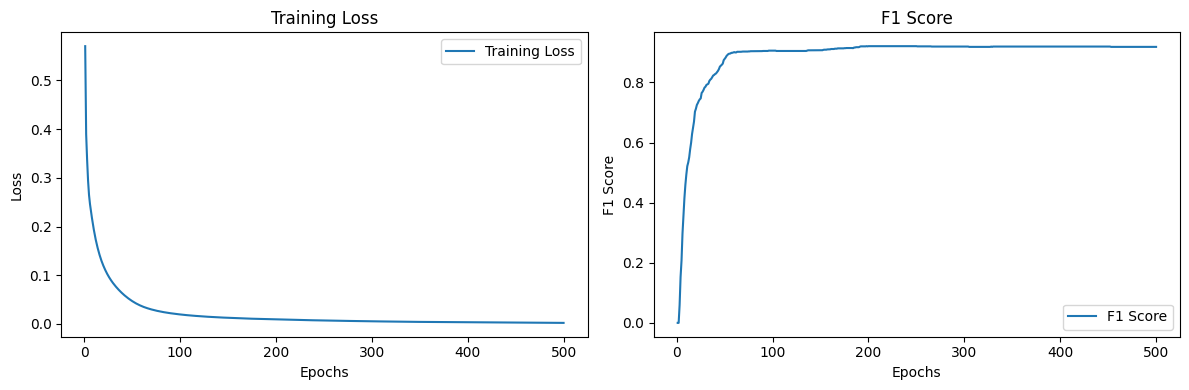

In [ ]:
import matplotlib.pyplot as plt

# 학습 중 loss 값을 기록할 리스트
train_losses = []
# Early stopping 관련 변수
best_loss = float('inf')
patience = 10
counter = 0
training_epochs = 500
# 학습 과정
for epoch in range(training_epochs):
    model.train()
    cost = 0
    n_batches = 0
    for X, y in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        y_hat = model(X)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()

        cost += loss.item()
        n_batches += 1

    cost /= n_batches
    train_losses.append(cost)  # 각 epoch에서의 loss 값을 기록
    print("Train")
    print('[Epoch: {:>4} cost = {:>.9}'.format(epoch + 1, cost))
    print('-------------------------------------------------------------')
    print("Dev")
    valid(val_loader, model)
    print('=============================================================')

    # Early stopping 검사
    if cost < best_loss:
        best_loss = cost
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break
torch.save(model.state_dict(), '2023710158.pt')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# f1_score 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(range(1, len(valid_f1_scores) + 1), valid_f1_scores, label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
f1_ = []
for i in range(len(valid_f1_scores)):
  f1_.append(valid_f1_scores[i].tolist())

In [ ]:
f1_ = max(f1_)
print("Best F1_Score : ", f1_)

Best F1_Score :  0.9207704067230225


In [ ]:
model.load_state_dict(torch.load("2023710158.pt"))

<All keys matched successfully>

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch
test_data = torch.utils.data.TensorDataset(test_x, test_y)

batch_size = 16
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [ ]:
test_loaderX

In [ ]:
import tqdm
valid_f1_scores = []
max_f1_scores = 0
def inference(data_loader, model):
    """ model inference """
    n_predict = 0
    f1_score = 0.0

    with torch.no_grad():
        for X, Y in tqdm.tqdm(data_loader):
            y_hat = model(X)
            predicted = (y_hat > 0.5).float()  # 이진 분류 임계값 설정 (0.5)
            f1_score += calculate_f1_score(Y, predicted) * len(predicted)
            n_predict += len(predicted)

    f1_score /= n_predict
    valid_f1_scores.append(f1_score)
    max_f1_scores = max(valid_f1_scores)
    print("[Epoch:{:>2}, F1 Score:={:>.9}".format(epoch + 1, f1_score))  # 개행 문자 추가

In [ ]:
test_f1 = inference(test_loader, model)

100%|██████████| 45/45 [00:00<00:00, 363.85it/s]

[Epoch:500, F1 Score:=0.890160918
